# Modelling

The following objective will be accomplished in this notebook:

1. Leveraging techniques such as preprocessing, feature engineering, selection, and transformation to build robust models that can identify customers at risk of leaving the company.

## 1. Data Preprocessing

### 1.1. Importing the libraries and dataset

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
# Load dataset 
file_path = '../data/telco_customer_churn.csv' # Define the relative path to the dataset

# Check if the file exists
if os.path.isfile(file_path):
    # If the file exists, read it into a pandas DataFrame
    dataset_uncleaned = pd.read_csv(file_path)
else:
    # If the file does not exist, raise an error with a helpful message
    raise FileNotFoundError(f"The file was not found at {file_path}")

# Display the first 10 rows 
dataset_uncleaned.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 1.2. Cleaning the data

In [3]:
# Convert the 'TotalCharges' column to numeric values
dataset_uncleaned['TotalCharges'] = pd.to_numeric(dataset_uncleaned['TotalCharges'], errors='coerce')

In [4]:
# Drop any rows that contain NaN values
dataset = dataset_uncleaned.dropna()

In [5]:
# Check for missing values
print(dataset.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Dataset is now clean.

In [6]:
# Confirm shape of dataset
dataset.shape

(7032, 21)

### 1.3. Feature engineering

This section aims to improve the accuracy and performance of the machine learning models by transforming the unrefined data into features with higher predictive power.

#### 1.3.1. Reducing redundancy and long labelling for improved readability

In [7]:
# Define columns and values to replace
cols_to_edit = {
    'MultipleLines': 'No phone service',
    ('OnlineSecurity',  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'): 'No internet service'
}


# Replace "No phone/internet service" with "No"
for key, value in cols_to_edit.items():
    if isinstance(key, tuple):
        for col in key:
            dataset[f"{col}_categorised"] = dataset[col].replace(value, 'No')
    else:
        dataset[f"{key}_categorised"] = dataset[key].replace(value, 'No')


# # Simplify PaymentMethod values
# dataset['PaymentMethod'] = dataset['PaymentMethod'].replace({
#     'Electronic check': 'Automatic',
#     'Mailed check': 'Manual',
#     'Bank transfer (automatic)': 'Automatic',
#     'Credit card (automatic)': 'Automatic',
# })

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1392629770.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f"{key}_categorised"] = dataset[key].replace(value, 'No')
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1392629770.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f"{col}_categorised"] = dataset[col].replace(value, 'No')
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1392629770.py:12: SettingWithCopyWarning: 
A value is trying

**<u>Reasoning behind adding these features:</u>**

Phone and internet-related services were collasped into two categories.
- This was done to avoid VIF scores of infinity which indicates high-levels of multicollinearity and in turn will affect linear-based models.
- Original columns will be kept for tree and gradient boosting models.

#### 1.3.2. Addressing skewness in 'MonthlyCharges' and 'TotalCharges'

Because 'TotalCharges' is heavily right-skewed and 'MonthlyCharges' is slightly left-skewed, log1p will be applied to both columns to transform them.

In [8]:
# Log transform MonthlyCharges
dataset['MonthlyCharges_log'] = np.log1p(dataset['MonthlyCharges'])

# Log transform TotalCharges
dataset['TotalCharges_log'] = np.log1p(dataset['TotalCharges'])

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1312576243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['MonthlyCharges_log'] = np.log1p(dataset['MonthlyCharges'])
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1312576243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['TotalCharges_log'] = np.log1p(dataset['TotalCharges'])


**<u>Reasoning behind adding these features:</u>**

Although tree-based models and gradient boosting models don’t care about skewness because they split based on thresholds and not distributions, this transformation will help with linear models such as (LogisticRegression, etc.) which are sensitive to highly skewed variables.

#### 1.3.3. Binning tenure into categories for modelling

In [9]:
# Defining the custom bins for categorising customer tenure (in months)
bins = [0, 24, 48, 73]

# Defining the corresponding labels for each bin
labels = ['Short term', 'Mid term', 'Long term']

# Categorising 'tenure' values into bins 
dataset['tenure_bin'] = pd.cut(dataset['tenure'], bins=bins, labels=labels, right=False)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/2352621443.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tenure_bin'] = pd.cut(dataset['tenure'], bins=bins, labels=labels, right=False)


**<u>Reasoning behind adding this feature:</u>**

Models such as LogisticRegression are sometimes better at identifying key patterns in categorised or binned feautures than raw numerical inputs such as tenure.

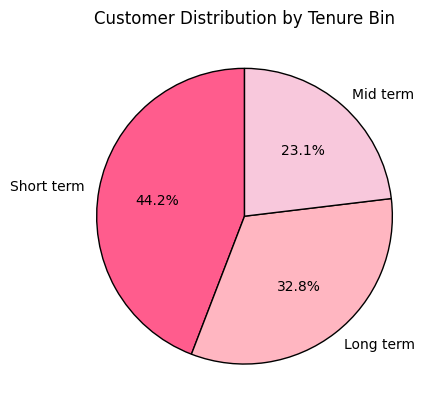

In [10]:
# Create pie chart to show the distribution of customers by tenure bin
dataset['tenure_bin'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                          startangle=90, colors=['#FF5C8D','#FFB6C1', '#F8C8DC'], 
                                          wedgeprops={'edgecolor': 'black', 'linewidth': 1})

# Add title
plt.title('Customer Distribution by Tenure Bin')

plt.ylabel('')  # Remove y-label

# Display chart
plt.show()

**<u>Observation:</u>** This corroborates the observations in the EDA notebook. There are more short-term and long-term customers than mid-term customers.

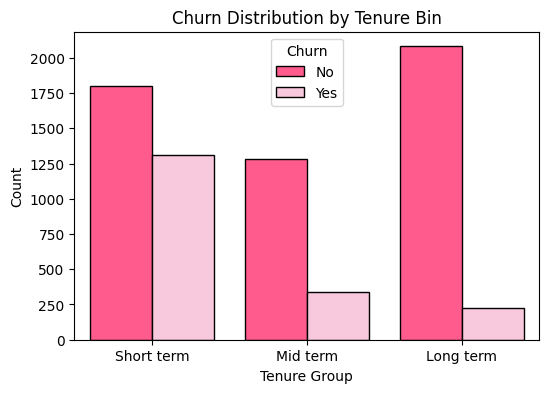

In [11]:
# Define custom color palette
custom_palette = ['#FF5C8D', '#F8C8DC']  # soft pink 

# Set figure size
plt.figure(figsize=(6,4))

# Create count plot showing the churn distribution by tenure bin
sns.countplot(x='tenure_bin', hue='Churn', data=dataset, palette=custom_palette, edgecolor='black', linewidth=1, saturation=1)

# Add title
plt.title('Churn Distribution by Tenure Bin')

# Add x-label
plt.xlabel('Tenure Group')

# Add y-label
plt.ylabel('Count')

# Display plot
plt.show()

**<u>Observation:</u>** Corroborates the results observed during the EDA stage. Short-term customers have much higher churn rates than any other tenure.

**<u>Notes</u>**
- Keep both tenure and tenure_bin to see if both features improve the results in the tree and gradient boosting models.
    - This is to give the models both raw precision and a more interpretable abstraction.
- Drop tenure and keep tenure_bin when using models that don’t handle raw numeric data well or that perform better with simplified inputs (like logistic regression). 
    - This is also to reduce multicollinearity or complexity.

#### 1.3.4. Binning MonthlyCharges into pricing tiers

Dividing the 'MonthlyCharges' variable into tiers based on prices (fixed ranges) for interpretation and business insight.

- Basic -> $18 - $40 (low spenders, maybe budget-conscious)

- Standard -> $40 - $70 (avergae users, mid-range services)

- Premium -> $70 - $95 (heavier users, possibly multiple services)

- Platinum -> $95 - $120 (top-tier spenders, very engaged customers)

In [12]:
# Define function to classify customers into pricing tiers based on MonthlyCharges
def monthly_plans(plan):
    # If monthly charge is less than $40 -> Basic plan
    if plan < 40: 
        return 'Basic'
    # If monthly charge is between $40 and $70 -> Standard plan
    elif plan < 70:
        return 'Standard'
    # If monthly charge is between $70 and $95 -> Premium plan
    elif plan < 95:
        return 'Premium'
    # If $95 or more -> Platinum plan
    else:
        return 'Platinum'

# Apply the function to create a new column 'monthly_pricing_tiers'
dataset['monthly_pricing_tiers'] = dataset['MonthlyCharges'].apply(monthly_plans)

# Count the number of customers in each pricing tier
dataset['monthly_pricing_tiers'].value_counts()

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/150459051.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['monthly_pricing_tiers'] = dataset['MonthlyCharges'].apply(monthly_plans)


monthly_pricing_tiers
Premium     2281
Basic       1831
Standard    1612
Platinum    1308
Name: count, dtype: int64

**<u>Observation:</u>** Most customers are on premium plans.


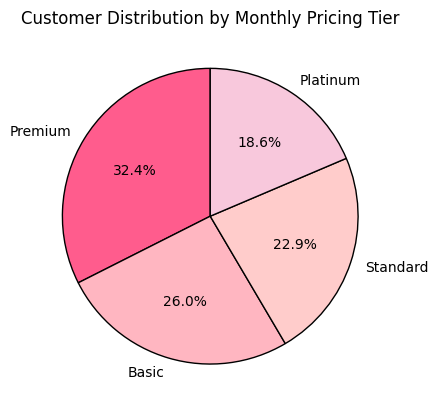

In [13]:
# Create pie chart to show the distribution of customers across monthly pricing tiers
dataset['monthly_pricing_tiers'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF5C8D','#FFB6C1', '#ffcccb', '#F8C8DC'],  # pinks 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # adds borders
)

# Add title
plt.title('Customer Distribution by Monthly Pricing Tier')

plt.ylabel('')  # Remove y-label

# Display the chart
plt.show()

**<u>Observation:</u>** Aligns with the value count above.


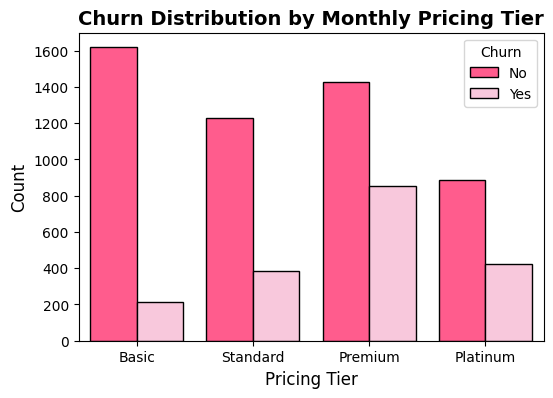

In [14]:
# Set the figure size
plt.figure(figsize=(6,4))

# Create the count plot to show churn distribution across pricing tiers
sns.countplot(
    x='monthly_pricing_tiers',
    hue='Churn',
    data=dataset,
    order=['Basic', 'Standard', 'Premium', 'Platinum'],
    palette=['#FF5C8D', '#F8C8DC'],  # custom colors
    edgecolor='black',
    linewidth=1,
    saturation=1 
)

# Add title
plt.title('Churn Distribution by Monthly Pricing Tier', fontsize=14, weight='bold')

# Add x-label
plt.xlabel('Pricing Tier', fontsize=12)

# Add y-label
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

**<u>Observation:</u>** Results still hold true with the results in the EDA. Customers paying around $71-$95 dollars are the most likely to churn.

#### 1.3.5. How far off are the reported TotalCharges from what we’d expect (MonthlyCharges * tenure)?

- Positive charge_diff -> Customers have paid more than expected (overpaid)
- Negative charge_diff -> Customers have paid less than expected (maybe due to waived fees, discounts, or churn interruptions) (underpaid)

In [15]:
# Creating new column to check for discrepancies
dataset['charge_diff'] = dataset['TotalCharges'] - (dataset['MonthlyCharges'] * dataset['tenure'])

# Display column to inspect discrepancies
dataset[['charge_diff']]

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/2752426864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['charge_diff'] = dataset['TotalCharges'] - (dataset['MonthlyCharges'] * dataset['tenure'])


,charge_diff
0,0.00
1,-46.80
2,0.45
3,-62.75
4,10.25
...,...
7038,-44.70
7039,-67.50
7040,20.85
7041,9.00


**<u>Reasoning behind adding this feature:</u>**

- Column could highlight billing issues, discounts, or partial months
- Column could be a proxy for irregularity in a customer's payment history

#### 1.3.6 Assessing the discrepancies found in charge_diff

- Billing issue: If the difference is large (positive or negative).
Example: If |charge_diff| is greater than 1 month's worth of charges -> that's suspicious.

- Discounts: If |charge_diff| is consistently negative but not huge.
Example: A customer has paid less than expected -> maybe because of promotions/discounts.

- Partial months: If |charge_diff| is small (positive or negative), often less than 1 month's charge.
Example: If someone joined mid-month or left mid-month.

In [16]:
# Define the function to categorise potential billing issues for each customer
def billing_issue(row):

    charge_diff = row['charge_diff']
    monthly_charge = row['MonthlyCharges']

    # If a customer joined/left mid-month
    if abs(charge_diff) < (0.5 * monthly_charge):
        return 'partial_month'
    
    # If a customer consistently paid less
    elif  (-1 * monthly_charge) <= charge_diff <= (-0.5 * monthly_charge):
        return 'discount'
    
    # If something is a billing issue
    elif abs(charge_diff) > monthly_charge:
        return 'billing_issue'
    
    # Perfectly aligned
    elif charge_diff == 0:
        return 'ok'
    
    return 'ok' # default match

# Apply row-wise
dataset['billing_flag'] = dataset.apply(billing_issue, axis = 1)
dataset['billing_flag'].value_counts()

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/2529302473.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['billing_flag'] = dataset.apply(billing_issue, axis = 1)


billing_flag
partial_month    3499
billing_issue    1947
discount          820
ok                766
Name: count, dtype: int64

**<u>Observations:</u>**

- partial_month (3,499 customers, ~50%)
    - Very common. Likely customers who joined or left mid-cycle. This makes sense as the dataset has lots of recent joiners and churners.
    - Interpretation: Not necessarily a problem, but shows how many “non-standard” months exist.

- billing_issue (1,947 customers, ~28%)
    - This is large. Since threshold is the “absolute difference > 1 month’s charge,” then there are serious mismatches between the expected and actual payments.
    - Interpretation: This group is worth investigating — it could be due to data quality issues, unusual billing practices, or misapplied fees.

- discount (820 customers, ~12%)
    - These customers consistently pay less than their expected monthly rate.
    - Interpretation: Customers could be on promotional offers, loyalty discounts, or bundled packages. Valuable for retention insight (discounted customers may churn less).

- ok (766 customers, ~11%)
    - Everything matches perfectly — “clean” billing.
    - Interpretation: This is the baseline group.

##### 1.3.6.1. Further analyising the billing _flag column

##### 1.3.6.1.1. (billing_flag vs Churn) 

Analysing whether billing issues, discounts, etc. are related to customer churn.

In [17]:
dataset[['billing_flag', 'Churn']]

# Create a normalised cross-tabulation (contingency table) between billing_flag and churn
cross_tab_billing_flag_with_churn = pd.crosstab(dataset['billing_flag'], dataset['Churn'], normalize='index') * 100

# Print the percentage table
print(cross_tab_billing_flag_with_churn.round(2))

# Print a separator line for readability
print("-" * 40)

Churn             No    Yes
billing_flag               
billing_issue  86.85  13.15
discount       81.34  18.66
ok             81.98  18.02
partial_month  62.22  37.78
----------------------------------------


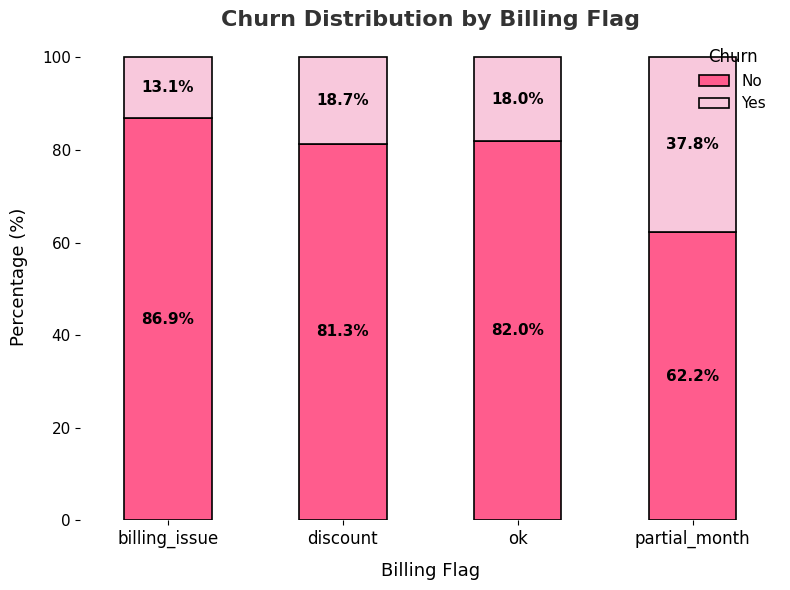

In [18]:
# Create a crosstab of billing_flag vs churn as percentages
cross_tab_billing_flag_with_churn = pd.crosstab(
    dataset['billing_flag'], 
    dataset['Churn'], 
    normalize='index'
) * 100

# Define custom colour palette
colors = ['#FF5C8D', '#F8C8DC']  # pinks

# Plot the crosstab as a stacked bar plot
ax = cross_tab_billing_flag_with_churn.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(8, 6),
    edgecolor='black',   
    linewidth=1.2
)

# Style adjustments for the plot
plt.title("Churn Distribution by Billing Flag", fontsize=16, weight='bold', color='#333')
plt.xlabel("Billing Flag", fontsize=13, labelpad=10)
plt.ylabel("Percentage (%)", fontsize=13, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)

# Add % labels on each stacked bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="black", fontsize=11, weight="bold")

# Customise legend appearance
plt.legend(title="Churn", fontsize=11, title_fontsize=12, loc="upper right", frameon=False)

# Remove frame for cleaner look
plt.box(False)

# Adjust spacing for a neat layout
plt.tight_layout()

# Display plot
plt.show()

**<u>Observations:</u>**
- Customers flagged as partial_month churn the most by far (≈38%).
    - Likely because they are joining/leaving mid-cycle, so they’re more transient.

- Discount and ok groups have similar churn (~18%).

- Billing issues surprisingly churn less (13%). This could mean:
    - They’re locked into longer contracts, or
    - Some billing discrepancies aren’t actually frustrating enough to trigger churn.

##### 1.3.6.1.2. (billing_flag vs Contract) 

This will identify which groups experience the most billing anomalies.

In [19]:
# Create a normalised cross-tabulation (contingency table) between billing_flag and Contract
cross_tab_billing_flag_with_contract = pd.crosstab(dataset['billing_flag'], dataset['Contract'], normalize='index') * 100

# Print the percentage table
print(cross_tab_billing_flag_with_contract.round(2))

# Print a separator line for readability
print("-" * 40)

Contract       Month-to-month  One year  Two year
billing_flag                                     
billing_issue           31.59     28.20     40.22
discount                48.29     23.78     27.93
ok                      48.43     25.46     26.11
partial_month           71.25     15.23     13.52
----------------------------------------


Contract       Month-to-month  One year  Two year
billing_flag                                     
billing_issue           31.59     28.20     40.22
discount                48.29     23.78     27.93
ok                      48.43     25.46     26.11
partial_month           71.25     15.23     13.52
----------------------------------------


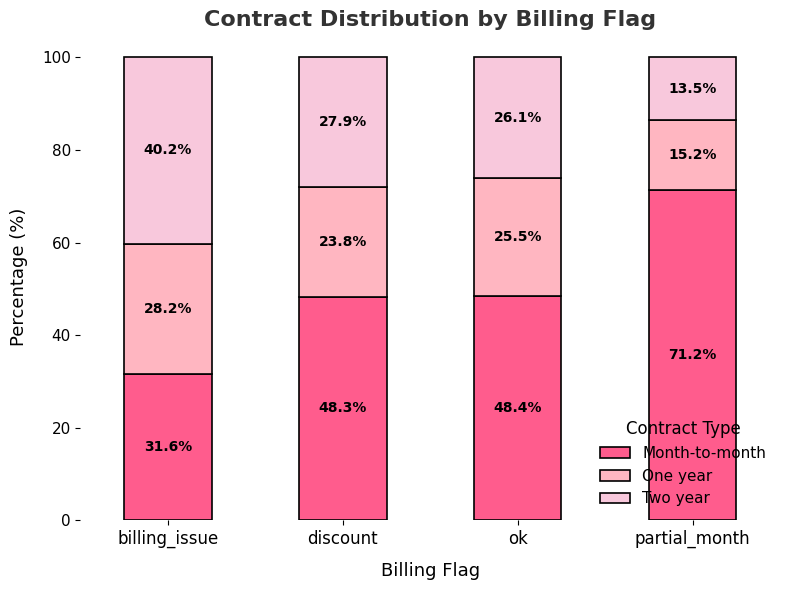

In [20]:
# Create a crosstab of billing_flag vs Contract as percentages
cross_tab_billing_flag_with_contract = pd.crosstab(
    dataset['billing_flag'], 
    dataset['Contract'], 
    normalize='index'
) * 100

print(cross_tab_billing_flag_with_contract.round(2))
print("-" * 40)

# Define custom colour palette
colors = ['#FF5C8D','#FFB6C1', '#F8C8DC']  # pink

# Plot the crosstab as a stacked bar plot
ax = cross_tab_billing_flag_with_contract.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(8, 6),
    edgecolor='black',
    linewidth=1.2,
     alpha=1
)

# Style adjustments for the plot
plt.title("Contract Distribution by Billing Flag", fontsize=16, weight='bold', color='#333')
plt.xlabel("Billing Flag", fontsize=13, labelpad=10)
plt.ylabel("Percentage (%)", fontsize=13, labelpad=10)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)

# Add % labels on each stacked bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="black", fontsize=10, weight="bold")

# Customise legend appearance
plt.legend(title="Contract Type", fontsize=11, title_fontsize=12, loc="lower right", frameon=False)

# Remove frame for cleaner look
plt.box(False)

# Adjust spacing for a neat layout
plt.tight_layout()

# Display the plot
plt.show()

**<u>Observations:</u>**
- Partial_month overwhelmingly happens in Month-to-month plans (71%).
    - Makes sense: people start/stop often. These are the riskiest churn customers.

- Billing issues are skewed to Two-year contracts (40%).
    - Suggests long-term customers may encounter billing mismatches more often. They don’t churn quickly, but they may become dissatisfied silently.

- Discounts are distributed, but lean toward shorter contracts.

##### 1.3.6.1.3. (billing_flag vs monthly_pricing_tiers) 

Analysing billing issues the relationship between billing discrepanices and monthly_pricing_tiers.

In [21]:
# Create a normalised cross-tabulation (contingency table) between billing_flag and monthly_pricing_tiers
cross_tab_billing_flag_with_pricing_tiers = pd.crosstab(dataset['billing_flag'], dataset['monthly_pricing_tiers'], normalize='index') * 100

# Print the percentage table
print(cross_tab_billing_flag_with_pricing_tiers.round(2))

# Print a separator line for readability
print("-" * 40)

monthly_pricing_tiers  Basic  Platinum  Premium  Standard
billing_flag                                             
billing_issue          38.26     18.90    23.99     18.85
discount               24.27     20.12    34.39     21.22
ok                     21.41     23.37    32.64     22.58
partial_month          20.66     17.03    36.64     25.66
----------------------------------------


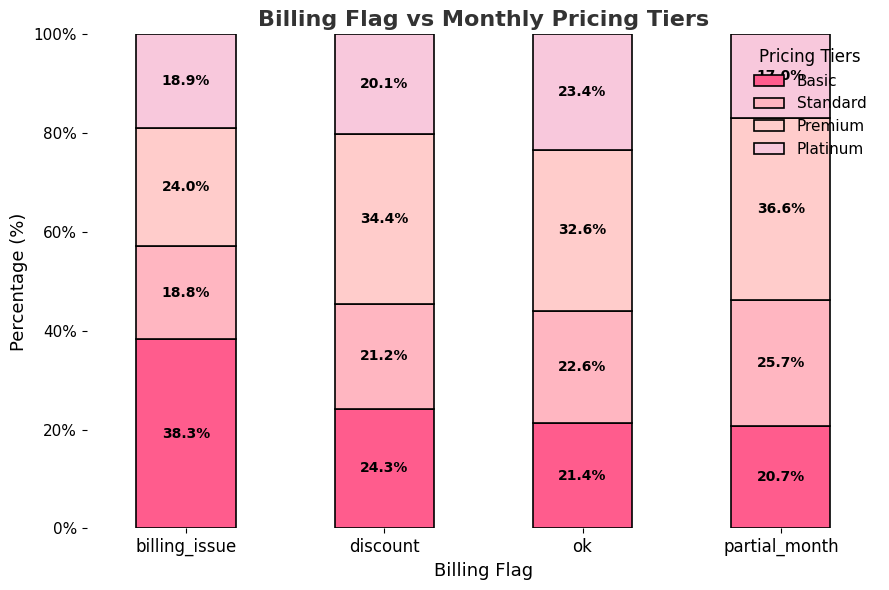

In [22]:
from matplotlib.ticker import PercentFormatter

# Create a crosstab of billing_flag vs monthly_pricing_tiers as percentages
cross_tab_billing_flag_with_pricing_tiers = pd.crosstab(
    dataset['billing_flag'],
    dataset['monthly_pricing_tiers'],
    normalize='index'
) * 100

# Enforce a column order for the tiers
order = ['Basic', 'Standard', 'Premium', 'Platinum']
cols = [c for c in order if c in cross_tab_billing_flag_with_pricing_tiers.columns]
ct = cross_tab_billing_flag_with_pricing_tiers[cols] if cols else cross_tab_billing_flag_with_pricing_tiers

# Define custom colour palette
colors = ['#FF5C8D','#FFB6C1', '#ffcccb', '#F8C8DC'] # pinks

# Plot the crosstab as a stacked bar plot
ax = ct.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

# Style adjustments for the plot
plt.title("Billing Flag vs Monthly Pricing Tiers", fontsize=16, weight='bold', color='#333')
plt.xlabel("Billing Flag", fontsize=13)
plt.ylabel("Percentage (%)", fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=11)
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(PercentFormatter(100))

# Add % labels on each stacked bar
for container in ax.containers:
    values = container.datavalues
    labels = [f"{v:.1f}%" if v > 0 else "" for v in values]
    ax.bar_label(container, labels=labels, label_type='center', color='black', fontsize=10, weight='bold')

# Customise legend appearance
plt.legend(title="Pricing Tiers", fontsize=11, title_fontsize=12, loc="upper right", frameon=False)

# Remove frame for a cleaner look
plt.box(False)

# Adjust spacing for a neat layout
plt.tight_layout()

# Display the plot
plt.show()

**<u>Observations</u>**
- Premium customers show the highest share of discounts (34%).
    - Possible targeted retention strategy: keep high-paying customers happy.

- Billing issues are concentrated in Basic plans (38%).
    - Lower-tier customers may be more sensitive to billing errors.

- Partial month occurs across tiers but highest in Premium (37%).
    - Suggests churn risk is high even among mid-high paying customers.

**<u>Overall Insight</u>**

- Partial-month customers (month-to-month contracts) are the main churn risk group — they’re flexible and leave easily.

- Billing issues affect long-term, basic plan customers — not an immediate churn trigger, but could harm satisfaction.

- Discounts seem effective, especially for Premium/Platinum tiers, where churn is lower compared to partial-month.

#### 1.3.7. Calculating the average charges per month

In [23]:
# Create a new column to calculate the average charges per month
dataset['average_charges_per_month'] = (dataset['TotalCharges'] / dataset['tenure']).round(2)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3631003718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['average_charges_per_month'] = (dataset['TotalCharges'] / dataset['tenure']).round(2)


**<u>Reasoning behind adding this feature:</u>**

- This feature was created to better measure customer value beyond ‘tenure’. ‘TotalCharges’ reflects overall revenue from a customer, however, it is heavily influenced by tenure. ‘average_total_charges’ makes it easier to segment customers by profitability by identifying high-value customers as well as those underutilising services or subscribing only to basic plans.

    - If low-value customers churn more -> they may be more price-sensitive -> the company could consider cheaper bundles, discounts, or targeted engagement as retention plans.

    - If high-value customers churn more -> business is losing its best customers -> this signals possible dissatisfaction with service quality or perceived cost vs. benefit.

    - If churn is evenly distributed -> customer value isn’t the main driver of churn -> so other factors (like contract type or support) might matter more.

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3000037144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Churn_encoded'] = dataset['Churn'].map({'No': 0, 'Yes': 1})
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3000037144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['avg_charge_bin'] = pd.qcut(dataset['average_charges_per_month'], q=5, duplicates='drop')
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3000037144.py:8: FutureWarn

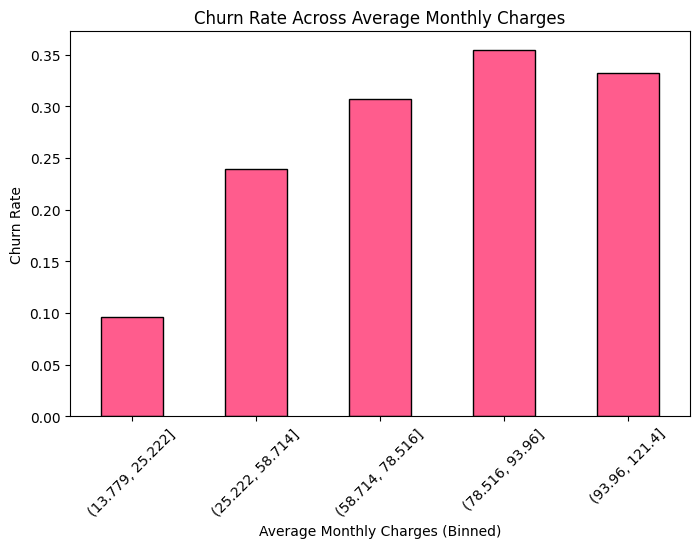

In [24]:
# # Convert Churn column to numeric 
dataset['Churn_encoded'] = dataset['Churn'].map({'No': 0, 'Yes': 1})

# Create bins for average_total_charges
dataset['avg_charge_bin'] = pd.qcut(dataset['average_charges_per_month'], q=5, duplicates='drop')

# Calculate churn rate per bin
churn_rates = dataset.groupby('avg_charge_bin')['Churn_encoded'].mean()

# Set figure size
plt.figure(figsize=(8,5))

# Plot churn rate by average charge bins
churn_rates.plot(kind='bar', edgecolor='black', color='#FF5C8D')

# Add title
plt.title('Churn Rate Across Average Monthly Charges')

# Add y-label
plt.ylabel('Churn Rate')

# Add x-label
plt.xlabel('Average Monthly Charges (Binned)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

**<u>Observations:</u>**
- Low-paying customers (< $25/month) are more loyal, possibly because they are on basic, affordable plans.

- Mid-to-high paying customers (>$60/month) are much more likely to churn, maybe due to:
    - Perception of higher cost vs. value
    - Competition offering cheaper alternatives
    - Extra services not matching expectations

In short: this validates the notion that as monthly charges rise, churn risk increases.

#### 1.3.8. Combining 'Contract' & 'tenure'

This will tell us how long a customer has stayed, relative to the contract they signed.

##### 1.3.8.1. Loyalty flag

In [25]:
# Create new feature 'contract_loyalty'
dataset['contract_loyalty'] = (
    (dataset['Contract'] != 'Month-to-month') & 
    (dataset['tenure'] > 12)).astype(int)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/374042641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['contract_loyalty'] = (


A customer is considered "loyal" if:
1. Their contract type is NOT 'Month-to-month'
2. Their tenure is greater than 12 months

The result is converted to integer: 
- 1: Has long contract and stayed over a year -> likely loyal
- 0: Either on month-to-month or hasn’t stayed long

##### 1.3.8.2. Contract progress

In [26]:
# Define the function to convert contract type into numeric length (in months)
def contract_length(contract):
    if contract == 'Month-to-month':     # Month-to-moth - 1 month
        return 1
    elif contract == 'One year':         # One year contract - 12 months
        return 12
    elif contract == 'Two year':         # Two year contract - 24 months
        return 24

# Apply the function to create new column "contract_length"
dataset['contract_length'] = dataset['Contract'].apply(contract_length)

# Create new column to calculate how far a customer has progressed into their contract
dataset['contract_progress'] = (dataset['tenure'] / dataset['contract_length']).round(2)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1793196401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['contract_length'] = dataset['Contract'].apply(contract_length)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1793196401.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['contract_progress'] = (dataset['tenure'] / dataset['contract_length']).round(2)


What it means:
- contract_progress = 1.0 -> they finished their contract
- **>1.0** -> they renewed their contract
- **<1.0** -> they're still within contract

This gives a numeric signal to the model about where the customer is in their commitment journey.

**<u>Reasoning behind adding these features (contract_loyalty and contract_progress):</u>**

These features were engineered to capture contract-related behaviour, since tenure alone does not guarantee commitment, and contract type alone does not prevent churn. By combining the two, the feature encodes a stronger signal of customer stability.


/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3649164391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['progress_bin'] = pd.cut(dataset['contract_progress'],
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3649164391.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_dist = dataset.groupby('progress_bin')['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()


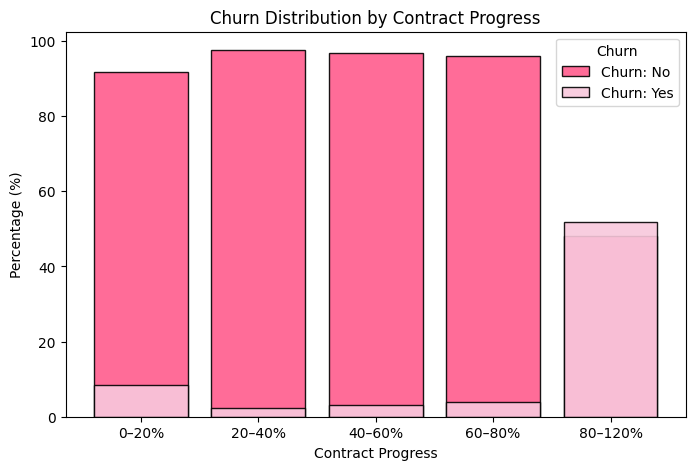

In [27]:
# Bin contract_progress into categories (e.g., 0–20%, 20–40%, etc.)
dataset['progress_bin'] = pd.cut(dataset['contract_progress'], 
                                 bins=[0, 0.2, 0.4, 0.6, 0.8, 1.2], 
                                 labels=['0–20%', '20–40%', '40–60%', '60–80%', '80–120%'])

# Calculate churn distribution per bin
churn_dist = dataset.groupby('progress_bin')['Churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

# Define custom colours for churn = Yes (1) and churn = No (0)
colors = {
    "Yes": '#F8C8DC',  
    "No":"#FF5C8D"   
}

# Plot churn distribution by contract progress
plt.figure(figsize=(8,5))

# Loop through each category (Yes/No)
for churn_status in churn_dist['Churn'].unique():
    # Filter dataset for the current churn category
    subset = churn_dist[churn_dist['Churn'] == churn_status]

    # Plot bars for each contract progress bin
    plt.bar(subset['progress_bin'], subset['percentage'],  
            label=f'Churn: {churn_status}', 
            alpha=0.9,
            color=colors[churn_status], edgecolor='black')  

# Add chart title and axis labels
plt.title('Churn Distribution by Contract Progress')

# Add y-label
plt.ylabel('Percentage (%)')

# Add x-label
plt.xlabel('Contract Progress')

# Add legend with churn categories
plt.legend(title='Churn')

# Display the plot
plt.show()

**<u>Interpretation:</u>**
1. Early stages (0–20%):
    - Churn rate is higher here (~10%) compared to later stages.
    - Suggests that a notable number of customers drop out early into their contracts.

2. Middle stages (20–80%):
    - Churn rate is very low (around 2–3%).
    - Most customers stick around once they pass the initial onboarding phase.

3. Final stage (80–120%):
    - Churn rate jumps up again (~50%).
    - Indicates that many customers are leaving as their contracts approach the end or just after the first cycle completes.

In [28]:
# Count how many customers fall into each unique value of 'contract_progress'
dataset['contract_progress'].value_counts()

contract_progress
1.00     642
3.00     553
2.00     271
4.00     193
5.00     152
        ... 
0.12       3
0.38       3
0.04       2
72.00      2
0.21       1
Name: count, Length: 174, dtype: int64

#### 1.3.9. How many add-ons does a customer subscribe to?

In [29]:
# Define the list of service-related columns to analyse
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a new column to count the number of services a customer is subscribed to
dataset['ServiceCount'] = (dataset[service_cols] == 'Yes').sum(axis=1)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3334356996.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['ServiceCount'] = (dataset[service_cols] == 'Yes').sum(axis=1)


In [30]:
# Print the sorted unique values of 'ServiceCount'
print(np.sort(dataset['ServiceCount'].unique()))

[0 1 2 3 4 5 6 7 8]


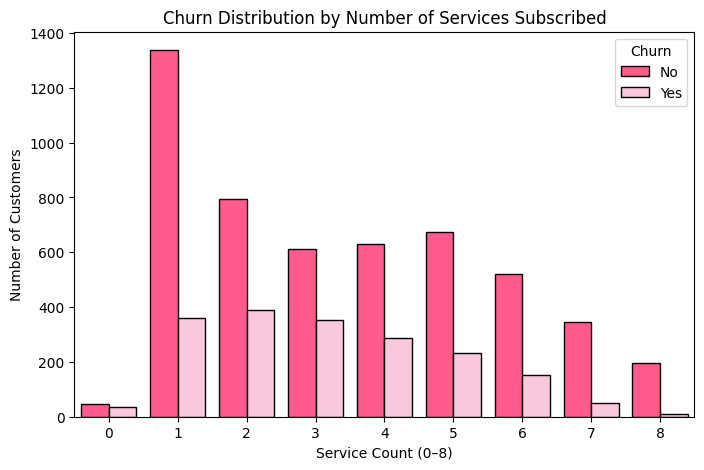

In [31]:
# Define custom colour palette
colors = ['#FF5C8D', '#F8C8DC'] # pink 

# Plot churn distribution across service counts
plt.figure(figsize=(8,5))
sns.countplot(data=dataset, x='ServiceCount', hue='Churn', palette=colors, edgecolor='black', saturation=1)

# Add title
plt.title("Churn Distribution by Number of Services Subscribed")

# Add x-label
plt.xlabel("Service Count (0–8)")

# Add y-label
plt.ylabel("Number of Customers")

# Add legend
plt.legend(title="Churn")

# Display plot
plt.show()

**<u>Reasoning behind adding this feature:</u>**

This feature was created to reflect the breadth of customer engagement. 
- Higher service counts suggest stronger attachment to the provided.
- Lower counts may indicate greater churn risk.
- The distribution below shows that customers with four or more services are significantly less likely to churn.
    - This suggests that broader adoption increases stickiness.

#### 1.3.10. How expensive was a customer's service relative to how long they stuck around?

In [32]:
# Create a new feature: charge-to-tenure ratio
dataset['charge_tenure_ratio'] = (dataset['MonthlyCharges'] / (dataset['tenure'] + 1)).round(2)

# Apply log transformation to reduce skewness in the ratio
dataset['charge_tenure_ratio_log'] = np.log1p(dataset['charge_tenure_ratio']).round(2)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1869627621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['charge_tenure_ratio'] = (dataset['MonthlyCharges'] / (dataset['tenure'] + 1)).round(2)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1869627621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['charge_tenure_ratio_log'] = np.log1p(dataset['charge_tenure_ratio']).round(2)


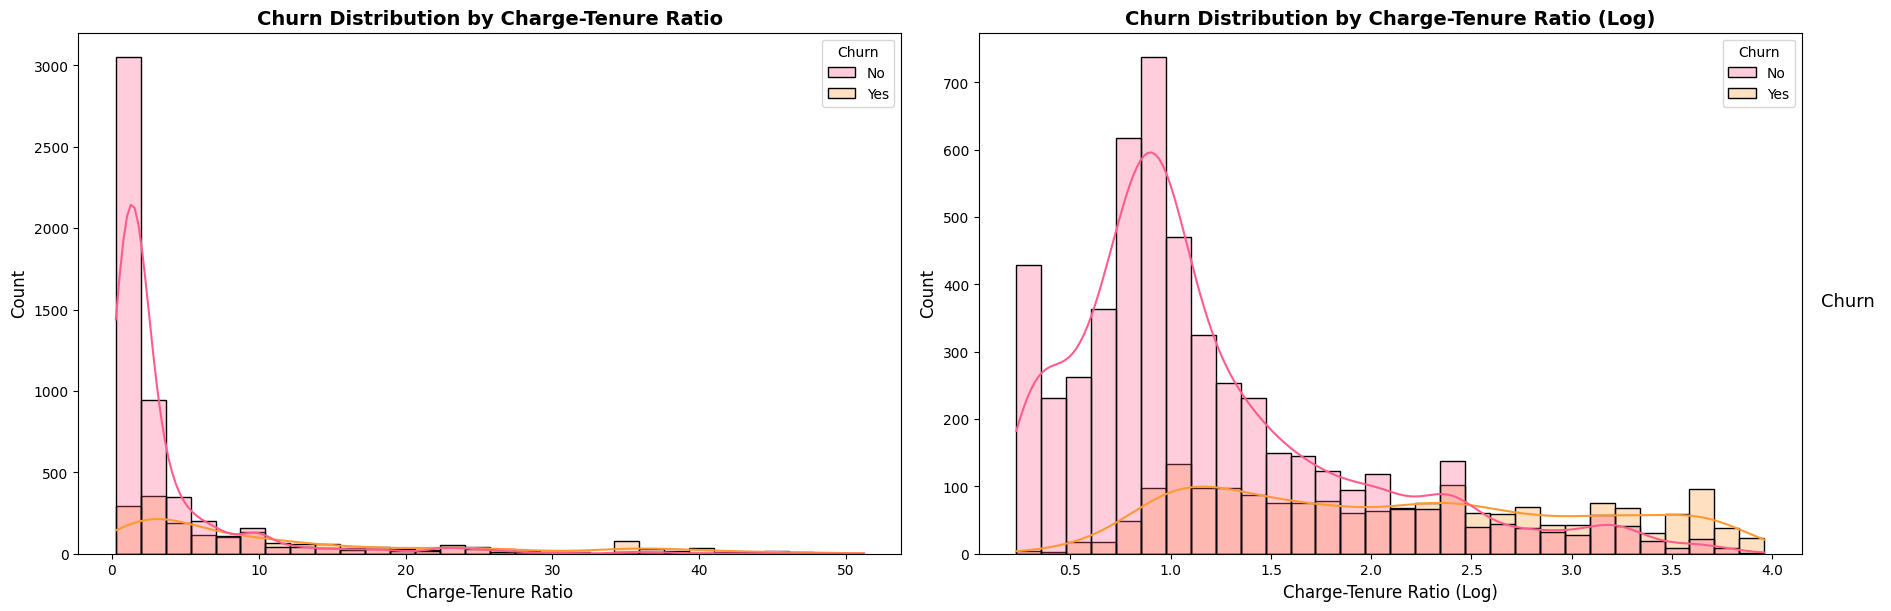

In [33]:
# Define figure with independent axes
fig, axes = plt.subplots(1, 2, figsize=(18,6), constrained_layout=True)

# Left plot: Raw charge-tenure ratio
sns.histplot(data=dataset,
             x='charge_tenure_ratio',
             hue='Churn',
             bins=30,
             kde=True,
             palette={'Yes': '#FF9933', 'No': '#FF5C8D'},
             alpha=0.3,
             ax=axes[0])
# Add title
axes[0].set_title("Churn Distribution by Charge-Tenure Ratio", fontsize=14, weight='bold')

# Add x-label

axes[0].set_xlabel("Charge-Tenure Ratio", fontsize=12)

# Add y-label
axes[0].set_ylabel("Count", fontsize=12)


# Right plot: Log-transformed ratio
sns.histplot(data=dataset,
             x='charge_tenure_ratio_log',
             hue='Churn',
             bins=30,
             kde=True,
             palette={'Yes': '#FF9933', 'No': '#FF5C8D'},
             alpha=0.3,
             ax=axes[1])
# Add title
axes[1].set_title("Churn Distribution by Charge-Tenure Ratio (Log)", fontsize=14, weight='bold')

# Add x-label
axes[1].set_xlabel("Charge-Tenure Ratio (Log)", fontsize=12)

# Add y-label
axes[1].set_ylabel("Count", fontsize=12)


# Shared legend (outside, right side)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Churn", fontsize=12, title_fontsize=13,
           loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False)

# Display plots
plt.show()

**<u>Reasoning behind adding this feature:</u>**

'charge_tenure_ratio" was introduced as a way to measure how expensive a customer’s plan is relative to their length of stay.

- Customers with high ratios are paying a large amount despite short tenures. This signifies potential signals of dissatisfaction or churn risk.
-  Conversely, low ratios reflect customers’ spending costs across longer stays. 

#### 1.3.11. Could a deeply engaged customer on a longer plan be less likely to leave? (Many services + one‑year contract)

- “Deeply engaged” -> ServicesCount is high
- “On a longer plan” -> Contract is either 'One year' or 'Two year'

What metric is used to decide when a customer is deeply engaged?

In [34]:
# Count how many customers fall into each possible number of subscribed services (0–8)
dataset['ServiceCount'].value_counts()

ServiceCount
1    1697
2    1186
3     965
4     921
5     906
6     674
7     395
8     208
0      80
Name: count, dtype: int64

In [35]:
# Get descriptive statistics of ServiceCount
dataset['ServiceCount'].describe()

count    7032.000000
mean        3.363339
std         2.062067
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         8.000000
Name: ServiceCount, dtype: float64

**<u>Summary of What the Data Says:</u>**
- Most common values: 1–3 services
- Median (50%): 3 services
- 75th percentile: 5 services
- Max: 8 services
- Only 25% of customers have more than 5 services
- Only ~21% (1495/7032) have 6 or more


To define deep engagement, it makes sense to pick above-average users, not average ones.
| Threshold | Label                        | % of customers |
| --------- | ---------------------------- | -------------- |
| ≥ 4       | Slightly above median        | \~39%          |
| ≥ 5       | 75th percentile or higher    | \~25%          |
| ≥ 6       | Top quartile (“power users”) | \~21%          |


This captures the top ~25% of customers with many subscribed services -> engagement and customers on 1-year or 2-year contracts = highly loyal.

In [36]:
# Create new feature called 'high_engagement_loyalty'
dataset['high_engagement_loyalty'] = (
    (dataset['ServiceCount'] >= 5) & 
    (dataset['contract_length'] >= 12)).astype(int)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/2935485112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['high_engagement_loyalty'] = (


A customer is considered "high engagement & loyal" if BOTH conditions hold:
1. They subscribe to 5 or more services (ServiceCount >= 5)
2. Their contract length is at least 12 months (contract_length >= 12)

The result is cast to an integer:
- 1: High engagement & loyal
- 0: Otherwise

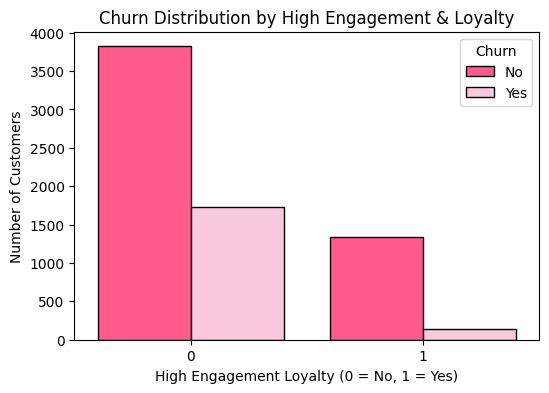

In [37]:
# Set figure size
plt.figure(figsize=(6,4))

# Create countplot of churn distribution across the new 'high_engagement_loyalty' feature
sns.countplot(data=dataset, x='high_engagement_loyalty', hue='Churn', palette=colors, edgecolor='black', saturation=1)

# Add title
plt.title("Churn Distribution by High Engagement & Loyalty")

# Add x-label
plt.xlabel("High Engagement Loyalty (0 = No, 1 = Yes)")

# Add y-label
plt.ylabel("Number of Customers")

# Add legend
plt.legend(title="Churn")

# Display plot
plt.show()

#### 1.3.12. Evaluation Stage: Adding New Features to Improve Metrics

These features were created to ⁠help separate false positives from true positives to help improve precision and the f1-score.

In [38]:
dataset["high_risk_contract"] = ((dataset["Contract"] == "Month-to-month") & 
                                      (dataset["MonthlyCharges"] > 80)).astype(int)

dataset["recent_high_charge"] = ((dataset["tenure"] < 12) & (dataset["MonthlyCharges"] > 90)).astype(int)

auto_methods = ["Bank transfer (automatic)", "Credit card (automatic)"]
dataset["is_auto_pay"] = dataset["PaymentMethod"].isin(auto_methods).astype(int)

dataset["is_electronic_check"] = (dataset["PaymentMethod"] == "Electronic check").astype(int)

dataset["security_bundle"] = (
    (dataset["OnlineSecurity"] == "Yes").astype(int) + 
    (dataset["OnlineBackup"] == "Yes").astype(int) + 
    (dataset["DeviceProtection"] == "Yes").astype(int) +
    (dataset["TechSupport"] == "Yes").astype(int)
)

dataset["entertainment_bundle"] = ((dataset["StreamingTV"] == "Yes") &
                                 (dataset["StreamingMovies"] == "Yes")).astype(int)


dataset["paperless_autopay"] = ((dataset["PaperlessBilling"] == "Yes") &
                              (dataset["is_auto_pay"] == 1)).astype(int)

dataset["senior_loyal"] = ((dataset["SeniorCitizen"] == 1) &
                         (dataset["tenure"] > 24)).astype(int)

dataset["is_long_contract"] = dataset["Contract"].isin(["One year", "Two year"]).astype(int)

dataset["family_flag"] = ((dataset["Partner"] == "Yes") | 
                        (dataset["Dependents"] == "Yes")).astype(int)

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1814244016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["high_risk_contract"] = ((dataset["Contract"] == "Month-to-month") &
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1814244016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["recent_high_charge"] = ((dataset["tenure"] < 12) & (dataset["MonthlyCharges"] > 90)).astype(int)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1814244016.

**<u>Rationale</u>**

1. <u>high_risk_contract</u>
   - Purpose: Identifies customers on month-to-month contracts with high monthly charges.
   - Reasoning: Such customers tend to be more likely to churn, as short-term contracts and expensive plans increase the likelihood of dissatisfaction or switching providers.
   - Impact: To help the model better distinguish high-risk customers, potentially improving recall for churners.


2. <u>recent_high_charge</u>
   - Purpose: Flags new customers (tenure < 12 months) with high monthly charges (> ₦90).
   - Reasoning: New customers paying high amounts may churn early if they feel overcharged or dissatisfied.
   - Impact: To try to better capture early churn behavior, improving precision and recall for short-term customer churn predictions.


3. <u>is_auto_pay</u>
   - Purpose: Indicates if the payment method is automatic (bank transfer or credit card).
   - Reasoning: Customers on auto-pay tend to stay subscribed longer and have lower churn risk due to convenience and inertia.
   - Impact: To add a stability indicator that will help the model better identify loyal customers.


4. <u>is_electronic_check</u>
   - Purpose: Flags customers who pay by electronic check.
   - Reasoning: This payment method has been found to correlate with higher churn rates, possibly due to manual payment effort or lower satisfaction.
   - Impact: To add a behavioral signal for churn-prone users, helping improve recall.


5. <u>security_bundle</u>
   - Purpose: Counts how many security-related services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport) a customer subscribes to.
   - Reasoning: Customers using more bundled services are typically more engaged and less likely to churn.
   - Impact: To try to improve precision by capturing deeper service engagement levels.


6. <u>entertainment_bundle</u>
   - Purpose: Flags customers who have both StreamingTV and StreamingMovies.
   - Reasoning: Customers who use both entertainment options are more integrated into the ecosystem, often showing lower churn tendency.
   - Impact: Adds lifestyle engagement context, which might help balance false positives in churn predictions.


7. <u>paperless_autopay</u>
   - Purpose: Identifies customers with paperless billing and auto-pay enabled.
   - Reasoning: These customers show digital convenience and trust, reducing churn likelihood.
   - Impact: To help strengthen prediction accuracy for low-risk segments, which in turn might help improve precision.


8. <u>senior_loyal</u>
   - Purpose: Flags senior citizens with tenure over 24 months.
   - Reasoning: Seniors who have stayed long are likely loyal and less prone to churn.
   - Impact: This might help the model avoid misclassifying stable long-term users as churners.


9. <u>is_long_contract</u>
   - Purpose: Marks customers with one- or two-year contracts.
   - Reasoning: Longer contracts usually mean lower churn risk, since such users are committed for extended periods.
   - Impact: To add contract stability information, which could help enhance precision.


10. <u>family_flag</u>
    - Purpose: Indicates if the customer has a partner or dependents.
    - Reasoning: Customers with family responsibilities are often more stable and less likely to churn** due to shared usage or bundled services.
    - Impact: Might be able to improve precision by identifying stable customer segments.


- These engineered features were designed to capture behavioral, financial, and contractual signals that influence customer retention. By integrating these patterns into the model, I aimed to reduce misclassifications — particularly improving recall for churn-prone customers and precision for loyal ones.

#### 1.3.13. Dropping features that are no longer needed

These are excluded because they are:
- Identifiers ('customerID') -> do not help prediction
- Raw features already transformed into engineered ones: ('MonthlyCharges', 'TotalCharges', 'charge_diff', 'charge_tenure_ratio', 'contract_length')
- Created for visualisation purposes: ('avg_charge_bin', 'progress_bin')
- The target variable ('Churn', 'Churn_encoded') -> must be separated from features

In [39]:
# Defining the list of features to remove before modeling
features_to_remove = ['customerID', 'MonthlyCharges', 'TotalCharges', 
                      'avg_charge_bin', 'charge_diff', 'charge_tenure_ratio', 
                      'contract_length', 'Churn', 'Churn_encoded', 'progress_bin']

### 1.4. Defining the matrix of features

In [40]:
# Defining the matrix of features
X_untransformed = dataset.drop(columns=features_to_remove, axis=1)

# Store the name of the features in a list 
feature_names = X_untransformed.columns.tolist()

In [41]:
# Display the first 10 rows of the new feature matrix
X_untransformed.head(10) 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,high_risk_contract,recent_high_charge,is_auto_pay,is_electronic_check,security_bundle,entertainment_bundle,paperless_autopay,senior_loyal,is_long_contract,family_flag
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,0,1,1,0,0,0,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,0,0,0,2,0,0,0,1,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,0,0,0,2,0,0,0,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,0,0,1,0,3,0,0,0,1,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,0,1,0,0,0,0,0,0
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,1,1,0,1,1,1,0,0,0,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,1,0,1,0,1,0,1,0,0,1
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,0,0,0,0,1,0,0,0,0,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,1,0,0,1,2,1,0,0,0,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,0,0,1,0,2,0,0,0,1,1


In [42]:
# Confirm the shape of the feature matrix
X_untransformed.shape

(7032, 45)

In [43]:
# Display concise information about the feature matrix
X_untransformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   gender                        7032 non-null   object  
 1   SeniorCitizen                 7032 non-null   int64   
 2   Partner                       7032 non-null   object  
 3   Dependents                    7032 non-null   object  
 4   tenure                        7032 non-null   int64   
 5   PhoneService                  7032 non-null   object  
 6   MultipleLines                 7032 non-null   object  
 7   InternetService               7032 non-null   object  
 8   OnlineSecurity                7032 non-null   object  
 9   OnlineBackup                  7032 non-null   object  
 10  DeviceProtection              7032 non-null   object  
 11  TechSupport                   7032 non-null   object  
 12  StreamingTV                   7032 non-null   object 

In [44]:
# Select all categorical columns (dtype = 'object') from X_untransformed
cat_cols = X_untransformed.select_dtypes(include='object')

# Loop through each categorical column and display its unique values
for col in cat_cols:
    # Print column name
    print(f"The values for {col} are:")
    # Show all unique categories in that column
    print(X_untransformed[col].unique())
    # Print separator line for readability
    print("-" * 40)

The values for gender are:
['Female' 'Male']
----------------------------------------
The values for Partner are:
['Yes' 'No']
----------------------------------------
The values for Dependents are:
['No' 'Yes']
----------------------------------------
The values for PhoneService are:
['No' 'Yes']
----------------------------------------
The values for MultipleLines are:
['No phone service' 'No' 'Yes']
----------------------------------------
The values for InternetService are:
['DSL' 'Fiber optic' 'No']
----------------------------------------
The values for OnlineSecurity are:
['No' 'Yes' 'No internet service']
----------------------------------------
The values for OnlineBackup are:
['Yes' 'No' 'No internet service']
----------------------------------------
The values for DeviceProtection are:
['No' 'Yes' 'No internet service']
----------------------------------------
The values for TechSupport are:
['No' 'Yes' 'No internet service']
----------------------------------------
The valu

In [45]:
# Select all categorical columns with dtype = 'category' (different from 'object')
cat_cols_2 = X_untransformed.select_dtypes(include='category')

# Loop through each categorical column and display its unique values
for col in cat_cols_2:
    # Print column name
    print(f"The values for {col} are:")
    # Show unique categories in that column
    print(X_untransformed[col].unique())
    # Separator line for clarity
    print("-" * 40)

The values for tenure_bin are:
['Short term', 'Mid term', 'Long term']
Categories (3, object): ['Short term' < 'Mid term' < 'Long term']
----------------------------------------


In [46]:
# Get the number of unique values in each column of X_untransformed
X_untransformed.nunique()

gender                             2
SeniorCitizen                      2
Partner                            2
Dependents                         2
tenure                            72
PhoneService                       2
MultipleLines                      3
InternetService                    3
OnlineSecurity                     3
OnlineBackup                       3
DeviceProtection                   3
TechSupport                        3
StreamingTV                        3
StreamingMovies                    3
Contract                           3
PaperlessBilling                   2
PaymentMethod                      4
MultipleLines_categorised          2
OnlineSecurity_categorised         2
OnlineBackup_categorised           2
DeviceProtection_categorised       2
TechSupport_categorised            2
StreamingTV_categorised            2
StreamingMovies_categorised        2
MonthlyCharges_log              1584
TotalCharges_log                6530
tenure_bin                         3
m

In [47]:
# Define the target variable 'y_df' from the original dataset
y_df = dataset['Churn']

### 1.5. Splitting the data into training and test sets

- X_untransformed: feature set
- y_df: target labels (Churn)
- stratify=y_df -> ensures class balance is preserved in both sets
- test_size=0.3 -> 30% of the data for testing, 70% for training
- random_state=42 -> ensures reproducibility of the split

In [48]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets in a ratio of 70:30 and applying stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_untransformed, y_df, stratify=y_df, test_size=0.3, random_state=42)

In [49]:
print(X_train.columns.tolist())


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MultipleLines_categorised', 'OnlineSecurity_categorised', 'OnlineBackup_categorised', 'DeviceProtection_categorised', 'TechSupport_categorised', 'StreamingTV_categorised', 'StreamingMovies_categorised', 'MonthlyCharges_log', 'TotalCharges_log', 'tenure_bin', 'monthly_pricing_tiers', 'billing_flag', 'average_charges_per_month', 'contract_loyalty', 'contract_progress', 'ServiceCount', 'charge_tenure_ratio_log', 'high_engagement_loyalty', 'high_risk_contract', 'recent_high_charge', 'is_auto_pay', 'is_electronic_check', 'security_bundle', 'entertainment_bundle', 'paperless_autopay', 'senior_loyal', 'is_long_contract', 'family_flag']


### 1.6. Encoding the features

#### 1.6.1. Dividing the data into feature groups by type for effective encoding

In [50]:
# Binary features: categorical columns with only two categories (Yes/No, Male/Female, etc.)
binary_features = ["gender", "Partner", "Dependents", "PhoneService",  
                   "MultipleLines_categorised", "OnlineSecurity_categorised", "OnlineBackup_categorised", 
                   "DeviceProtection_categorised", "TechSupport_categorised", "StreamingTV_categorised", 
                   "StreamingMovies_categorised", "PaperlessBilling"]

# Ordinal features: categorical variables with a natural order (e.g., contract length, tenure bins, pricing tiers)
ordinal_features = ["Contract", "tenure_bin", "monthly_pricing_tiers"]

# Nominal features: categorical variables without an inherent order (e.g., Internet type, payment method, billing flag) - 
# (contract_paperless commented out for now, but can be added if needed during evaluation)
# nominal_features = ["InternetService", "PaymentMethod", "billing_flag", "contract_paperless"]
nominal_features = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
                   "DeviceProtection", "TechSupport", "StreamingTV", 
                   "StreamingMovies", "PaymentMethod", "billing_flag"]

# Numeric features: automatically select all numeric columns
numeric_features = X_untransformed.select_dtypes(include='number')

In [51]:
# Display numeric features
numeric_features

,SeniorCitizen,tenure,MonthlyCharges_log,TotalCharges_log,average_charges_per_month,contract_loyalty,contract_progress,ServiceCount,charge_tenure_ratio_log,high_engagement_loyalty,high_risk_contract,recent_high_charge,is_auto_pay,is_electronic_check,security_bundle,entertainment_bundle,paperless_autopay,senior_loyal,is_long_contract,family_flag
0,0,1,3.429137,3.429137,29.85,0,1.00,1,2.77,0,0,0,0,1,1,0,0,0,0,1
1,0,34,4.059581,7.544597,55.57,1,2.83,3,0.97,0,0,0,0,0,2,0,0,0,1,0
2,0,2,4.004602,4.692723,54.08,0,2.00,3,2.94,0,0,0,0,0,2,0,0,0,0,0
3,0,45,3.768153,7.518471,40.91,1,3.75,3,0.65,0,0,0,1,0,3,0,0,0,1,0
4,0,2,4.272491,5.028148,75.82,0,2.00,1,3.20,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,4.452019,7.596643,82.94,1,2.00,7,1.48,1,0,0,0,0,3,1,0,0,1,1
7039,0,72,4.646312,8.904345,102.26,1,6.00,6,0.88,1,0,0,1,0,2,1,1,0,1,1
7040,0,11,3.421000,5.850621,31.50,0,11.00,1,1.24,0,0,0,0,1,1,0,0,0,0,1
7041,1,4,4.322807,5.728800,76.65,0,4.00,2,2.77,0,0,0,0,0,0,0,0,0,0,1


#### 1.6.2. Applying label, ordinal, and one-hot encoding based on feature group

In [52]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Separate groups
# Identify numeric features explicitly (not in ordinal, binary, or nominal groups)
num_features = [col for col in X_train.columns 
                if col not in ordinal_features + binary_features + nominal_features]

# Ordinal Encoding: For ordered categorical features (Contract, tenure_bin, monthly_pricing_tiers) 
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Fit-transform on training data
X_train_ord = pd.DataFrame(
    ordinal_encoder.fit_transform(X_train[ordinal_features]),
    columns=ordinal_features,
    index=X_train.index
)

# Transform on test data
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test[ordinal_features]),
    columns=ordinal_features,
    index=X_test.index
)


# Label Encoding: For binary features (Yes/No type variables)
X_train_bin = X_train[binary_features].copy()
X_test_bin = X_test[binary_features].copy()

for col in binary_features:
    le = LabelEncoder()

    # Fit + transform on training data
    X_train_bin[col] = le.fit_transform(X_train[col])

    # Only transform on testing data
    X_test_bin[col] = le.transform(X_test[col])


# One-Hot Encoding: For unordered categorical variables 
ohe_full = OneHotEncoder(drop=None, handle_unknown="ignore", sparse_output=False)     # full version keeps all categories
ohe_drop = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)  # drop="first" version avoids multicollinearity (for linear models)


# Full OHE (for tree models)
X_train_nom_full = pd.DataFrame(
    ohe_full.fit_transform(X_train[nominal_features]),
    columns=ohe_full.get_feature_names_out(nominal_features),
    index=X_train.index
)

X_test_nom_full = pd.DataFrame(
    ohe_full.transform(X_test[nominal_features]),
    columns=ohe_full.get_feature_names_out(nominal_features),
    index=X_test.index
)

# Drop-first OHE (for linear models)
X_train_nom_drop = pd.DataFrame(
    ohe_drop.fit_transform(X_train[nominal_features]),
    columns=ohe_drop.get_feature_names_out(nominal_features),
    index=X_train.index
)

X_test_nom_drop = pd.DataFrame(
    ohe_drop.transform(X_test[nominal_features]),
    columns=ohe_drop.get_feature_names_out(nominal_features),
    index=X_test.index
)

# Numeric features (kept as-is)
X_train_num = X_train[num_features].copy()
X_test_num = X_test[num_features].copy()

# Combine everything back into model-ready datasets

# For tree-based models (can handle redundant categories -> using full OHE)
X_train_tree = pd.concat([X_train_num, X_train_ord, X_train_bin, X_train_nom_full], axis=1)
X_test_tree  = pd.concat([X_test_num,  X_test_ord,  X_test_bin,  X_test_nom_full], axis=1)

# For linear models (avoid multicollinearity -> using drop-first OHE)
X_train_linear = pd.concat([X_train_num, X_train_ord, X_train_bin, X_train_nom_drop], axis=1)
X_test_linear  = pd.concat([X_test_num,  X_test_ord,  X_test_bin,  X_test_nom_drop], axis=1)

In [54]:
import joblib 

# Create a directory to store encoders if it doesn’t exist
os.makedirs("../encoders", exist_ok=True)

# Save encoders
joblib.dump(ordinal_encoder, "../encoders/ordinal_encoder.pkl")
joblib.dump(ohe_full, "../encoders/ohe_full.pkl")
joblib.dump(ohe_drop, "../encoders/ohe_drop.pkl")


# You have multiple LabelEncoders (one per binary column)
# Save them together as a dictionary
label_encoders = {}
for col in binary_features:
    le = LabelEncoder()
    le.fit(X_train[col])
    label_encoders[col] = le

joblib.dump(label_encoders, "../encoders/label_encoders.pkl")

['../encoders/label_encoders.pkl']

In [55]:
# Check for missing values after encoding
print(X_test_linear.isna().sum())
print(X_test_tree.isna().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges_log                       0
TotalCharges_log                         0
average_charges_per_month                0
contract_loyalty                         0
contract_progress                        0
ServiceCount                             0
charge_tenure_ratio_log                  0
high_engagement_loyalty                  0
high_risk_contract                       0
recent_high_charge                       0
is_auto_pay                              0
is_electronic_check                      0
security_bundle                          0
entertainment_bundle                     0
paperless_autopay                        0
senior_loyal                             0
is_long_contract                         0
family_flag                              0
Contract                                 0
tenure_bin                               0
monthly_pricing_tiers                    0
gender     

In [56]:
# Check the shape of processed datasets - Tree dataset uses full one-hot encoding (many more columns)
print(f"One-hot encoded shape for X_train_tree: {X_train_tree.shape}")  
print(f"Label encoded shape for X_train_linear: {X_train_linear.shape}") 

# Check the shape of processed datasets - Linear dataset uses drop-first encoding (fewer columns to avoid multicollinearity)
print(f"One-hot encoded shape for X_test_tree: {X_test_tree.shape}")  
print(f"Label encoded shape for X_test_linear: {X_test_linear.shape}")  

One-hot encoded shape for X_train_tree: (4922, 67)
Label encoded shape for X_train_linear: (4922, 57)
One-hot encoded shape for X_test_tree: (2110, 67)
Label encoded shape for X_test_linear: (2110, 57)


In [57]:
# Ensure that the number of rows after splitting into train/test still matches the original dataset
print("Total rows after split:", len(X_train_tree) + len(X_test_tree))
print("Original rows:", len(X_untransformed))

Total rows after split: 7032
Original rows: 7032


#### 1.6.3. Encoding the dependent variable vector

In [58]:
# Define the dependent variable vector
y = dataset['Churn'].values
print(y)

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialise LabelEncoder
le = LabelEncoder()

# Fit and transform on training labels
y_train = le.fit_transform(y_train)

# Transform test labels using the same mapping
y_test = le.transform(y_test)

In [60]:
# Print encoded results of y-train
print(y_train)

[1 0 0 ... 0 0 1]


In [61]:
# Print encoded results of y-test
print(y_test)

[0 0 0 ... 0 0 0]


### 1.7. Feature scaling

The feature matrix for tree-based models will not be scaled, but for linear models, the charge_tenure_ratio_log variable will be scaled.

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialise StandardScaler
scaler = StandardScaler()

# Fit and transform training data: Scaling only 'charge_tenure_ratio_log'
X_train_linear['charge_tenure_ratio_log'] = scaler.fit_transform(
    X_train_linear[['charge_tenure_ratio_log']]
)
# Transform testing data: Scaling only 'charge_tenure_ratio_log'
X_test_linear['charge_tenure_ratio_log'] = scaler.transform(
    X_test_linear[['charge_tenure_ratio_log']]
)

### 1.8. Feature selection

#### 1.8.1. Observing correlations between features and the target variable  

In [63]:
# Convert datasets back to dataframes
X_train_tree = pd.DataFrame(X_train_tree)
X_train_linear = pd.DataFrame(X_train_linear)
y_train_df = pd.DataFrame(y_df)

In [64]:
# Count how many columns are of each dtype in X_train_tree
X_train_tree.dtypes.value_counts()

# Convert all columns in X_train_tree to numeric types.
X_train_tree = X_train_tree.apply(pd.to_numeric, errors="coerce")

# Count how many columns are of each dtype in X_train_linear
X_train_linear.dtypes.value_counts()

# Convert all columns in X_train_linear to numeric types.
X_train_linear = X_train_linear.apply(pd.to_numeric, errors="coerce")

In [65]:
# Confirm shape of X_train_tree
print(X_train_tree.shape)

# Confirm shape of X_train_linear
print(X_train_linear.shape)

(4922, 67)
(4922, 57)


##### 1.8.1.1. Checking for multicollinearity

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining the function to calculate the Variance Inflation Factor (VIF)
def calculate_vif(data):

    # Prepare empty DataFrame to store results
    vif_data = pd.DataFrame()

    # Store feature names
    vif_data['feature'] = data.columns
    
    # Compute VIF for each column
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

    # Return results
    return vif_data

In [67]:
# Display VIF scores for tree matrix
print("Tree features VIF:")
display(calculate_vif(X_train_tree))

# Display VIF scores for linear matrix
print("Linear features VIF:")
display(calculate_vif(X_train_linear))

Tree features VIF:


/Users/eseoseodion/Documents/Portfolio/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,SeniorCitizen,2.514420
1,tenure,24.995111
2,MonthlyCharges_log,316.135728
3,TotalCharges_log,148.276265
4,average_charges_per_month,151.602436
...,...,...
62,PaymentMethod_Mailed check,inf
63,billing_flag_billing_issue,inf
64,billing_flag_discount,inf
65,billing_flag_ok,inf


Linear features VIF:


/Users/eseoseodion/Documents/Portfolio/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,SeniorCitizen,2.514420
1,tenure,24.995111
2,MonthlyCharges_log,316.135728
3,TotalCharges_log,148.276265
4,average_charges_per_month,151.602436
5,contract_loyalty,14.978817
6,contract_progress,7.418665
7,ServiceCount,inf
8,charge_tenure_ratio_log,103.991463
9,high_engagement_loyalty,4.692441


**<u>General VIF thresholds:</u>**
- VIF < 5 -> No problem, safe to keep.
- VIF 5–10 -> Moderate multicollinearity, it's best to be cautious.
- VIF > 10 -> High multicollinearity, should consider dropping or combining features.
- VIF = ∞ -> Perfect collinearity — features are linear combinations of others, must drop or reduce.

**<u>Key Observations from table:</u>**

<u>VIF Values < 5 (low collinearity - safe to keep):</u>

- SeniorCitizen, gender, Partner, Dependents, PaperlessBilling, high_engagement_loyalty 

<u>VIF Values (5-10) (moderate collinearity - monitor, might combine/drop later):</u>

- Contract, contract_progress, monthly_pricing_tiers, contract_loyalty 

<u>VIF Values > 10 (High collinearity - needs action):</u>

- tenure, tenure_bin, TotalCharges_log, MonthlyCharges_log, average_charges_per_month, charge_tenure_ratio_log

<u>VIF Values = ∞ (Perfect collinearity - drop or reduce):</u>

- ServiceCount, PhoneService, MultipleLines_categorised / MultipleLines_[No, No phone service, Yes], OnlineSecurity_categorised / OnlineSecurity_[No, No internet service, Yes], OnlineBackup_categorised / OnlineBackup_[No, No internet service, Yes], DeviceProtection_categorised / DeviceProtection_[No, No internet service, Yes], TechSupport_categorised / TechSupport_[No, No internet service, Yes], StreamingTV_categorised / StreamingTV_[No, No internet service, Yes], StreamingMovies_categorised / StreamingMovies_[No, No internet service, Yes], InternetService_[DSL, Fiber optic, No], PaymentMethod_[Bank transfer, Credit card, Electronic check, Mailed check], billing_flag_[billing_issue, discount, ok, partial_month]

**<u>Strategies:</u>**
1. For Logistic Regression / linear models:
    - Drop or carefully choose between: tenure vs tenure_bin vs contract_progress vs contract_loyalty as they overlap heavily:
        - Keep tenure_bin and drop tenure. Keep contract_progress and drop contract_loyalty.
    - PhoneService vs MultipleLines are very correlated:
        - Keep MultipleLines, drop raw PhoneService.
    - charge_tenure_ratio_log vs tenure/MonthlyCharges_log:
        - Keep charge_tenure_ratio_log, drop tenure + MonthlyCharges_log to reduce redundancy.
    - Drop contract_loyalty, keep Contract.
    - Drop one-hot encoded service features and keep only collapsed columns.


2. For Tree-based models:
    - Keep all of them. Trees don’t break from collinearity, they just ignore redundant splits.
        - Keep everything if performance improves — no need to drop unless interpretability is a concern.

In [68]:
# --- Uncomment during evaluation stage ---
# redundant_cols = ['MonthlyCharges_log', 'TotalCharges_log', 'average_charges_per_month',
#                  'ServiceCount', 'MultipleLines_No phone service', 'MultipleLines_Yes', 
#                  'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
#                  'OnlineBackup_No internet service', 'OnlineBackup_Yes',
#                  'DeviceProtection_No internet service', 'DeviceProtection_Yes',
#                  'TechSupport_No internet service', 'TechSupport_Yes',
#                  'StreamingTV_No internet service', 'StreamingTV_Yes',
#                  'StreamingMovies_No internet service', 'StreamingMovies_Yes', 
#                  'security_bundle', 'contract_paperless_Month-to-month_Yes', 'contract_paperless_One year_No',
#                 'contract_paperless_One year_Yes', 'contract_paperless_Two year_No', 
#                 'contract_paperless_Two year_Yes', 'streaming_bundle']

# Defining the list of features to drop  (Comment out during evaluation stage)
redundant_cols_linear = ['MonthlyCharges_log', 'TotalCharges_log', 'average_charges_per_month',
                  'ServiceCount', 'MultipleLines_No phone service', 'MultipleLines_Yes', 
                  'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
                  'OnlineBackup_No internet service', 'OnlineBackup_Yes',
                  'DeviceProtection_No internet service', 'DeviceProtection_Yes',
                  'TechSupport_No internet service', 'TechSupport_Yes',
                  'StreamingTV_No internet service', 'StreamingTV_Yes',
                  'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'is_auto_pay', 'is_electronic_check', 'security_bundle'                 
]


# Drop features that are high in multicollinearity in the linear feature matrix
X_train_linear = X_train_linear.drop(columns=redundant_cols_linear, axis=1)

In [69]:
# Store both encoded training datasets in a list for iteration
encoded_datasets = [X_train_tree, X_train_linear]

# Loop through each encoded dataset
for i in encoded_datasets:
    # Check which dataset is being processed 
    if i is not X_train_linear:
        print("VIF Without 'drop_first' (After Dropping Redundant Cols)")
        display(calculate_vif(i)) # Calculate and display VIF values
    else:
        print("VIF With 'drop_first' (After Dropping Redundant Cols)")
        display(calculate_vif(i)) # Calculate and display VIF values

VIF Without 'drop_first' (After Dropping Redundant Cols)


/Users/eseoseodion/Documents/Portfolio/.venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,SeniorCitizen,2.514420
1,tenure,24.995111
2,MonthlyCharges_log,316.135728
3,TotalCharges_log,148.276265
4,average_charges_per_month,151.602436
...,...,...
62,PaymentMethod_Mailed check,inf
63,billing_flag_billing_issue,inf
64,billing_flag_discount,inf
65,billing_flag_ok,inf


VIF With 'drop_first' (After Dropping Redundant Cols)


,feature,VIF
0,SeniorCitizen,2.979693
1,tenure,32.984991
2,contract_loyalty,25.113892
3,contract_progress,9.963820
4,charge_tenure_ratio_log,6.855722
5,high_engagement_loyalty,5.538035
6,high_risk_contract,4.040216
7,recent_high_charge,1.357319
8,entertainment_bundle,7.711738
9,paperless_autopay,4.541637


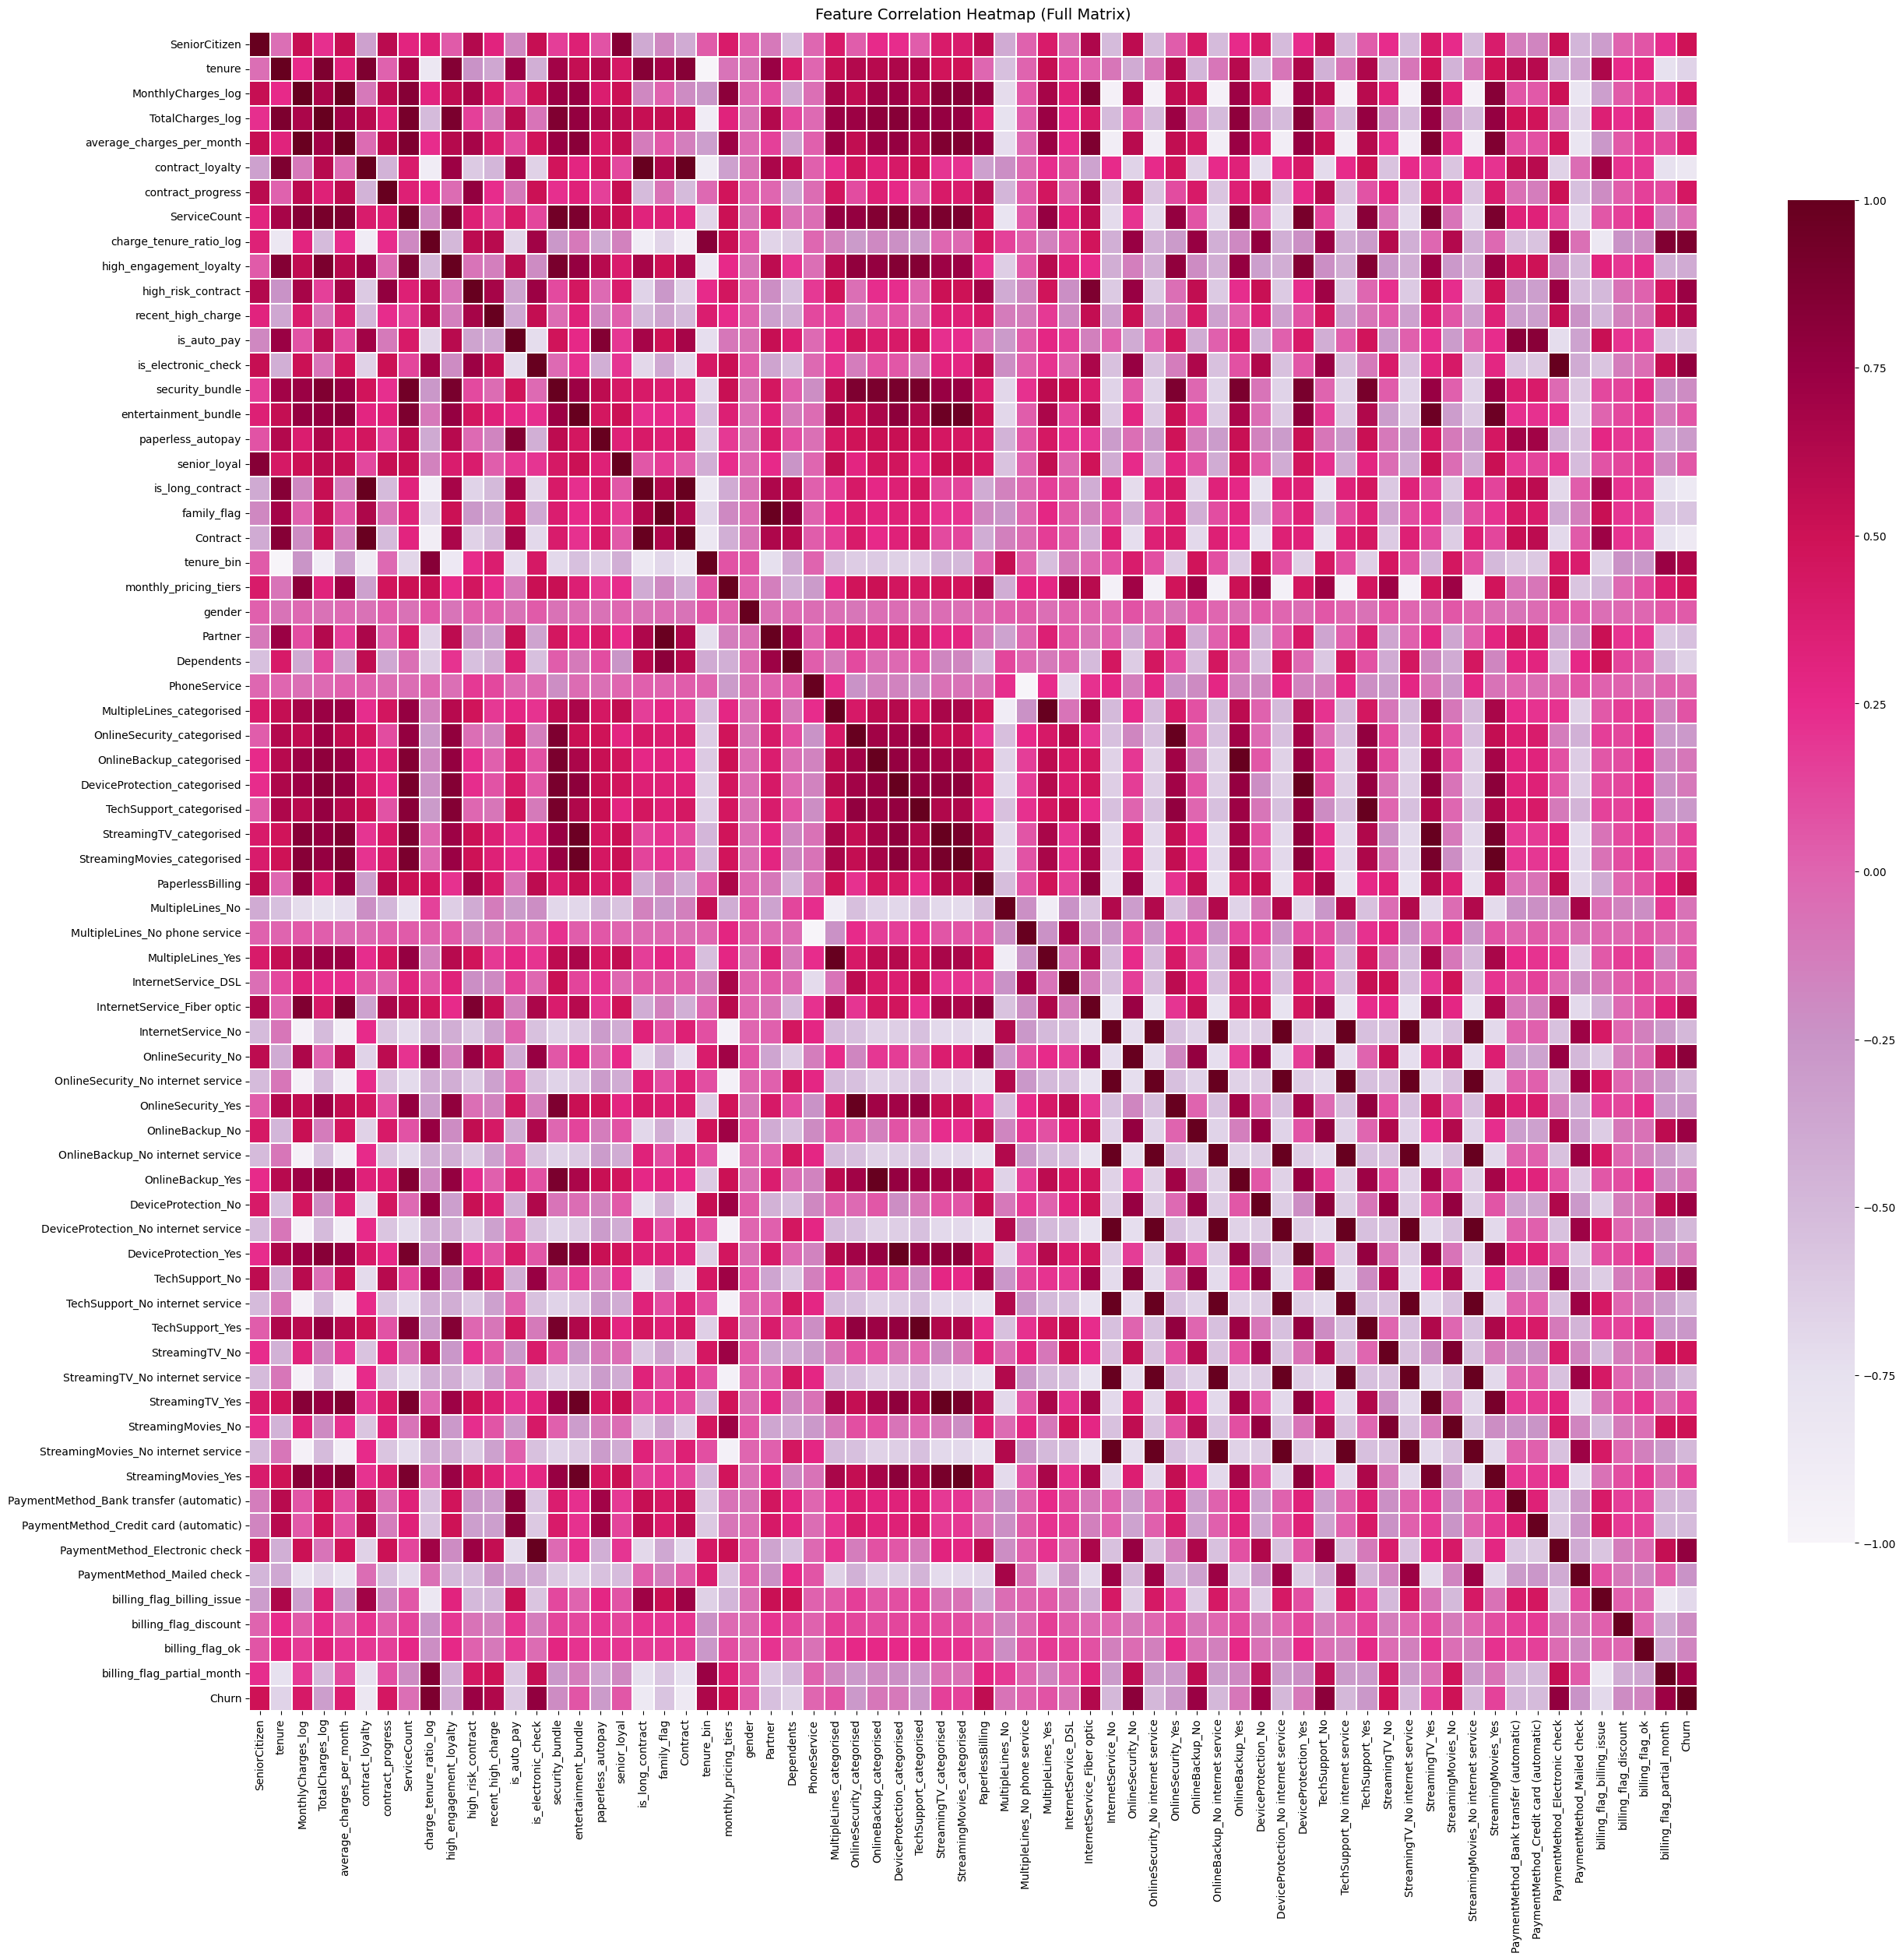

In [70]:
from matplotlib.colors import LinearSegmentedColormap

# Make a copy of the training dataset for tree-based models
corr_data_tree = X_train_tree.copy()

# Add the target column 'Churn' to the dataset to analyse correlations
corr_data_tree["Churn"] = y_train  

# Compute the pairwise correlation matrix for all features + target
corr_matrix_tree = corr_data_tree.corr()

# Set figure size
plt.figure(figsize=(30,28)) # Make the heatmap large for readability

# Plot the heatmap of correlations
sns.heatmap(
    corr_matrix_tree.corr(),
    cmap="PuRd", 
    center=0,
    annot=False,
    linewidths=0.1,
    cbar_kws={"shrink": .8}
)

# Add title
plt.title("Feature Correlation Heatmap (Full Matrix)", fontsize=14, pad=12)

# Display heatmap
plt.show()

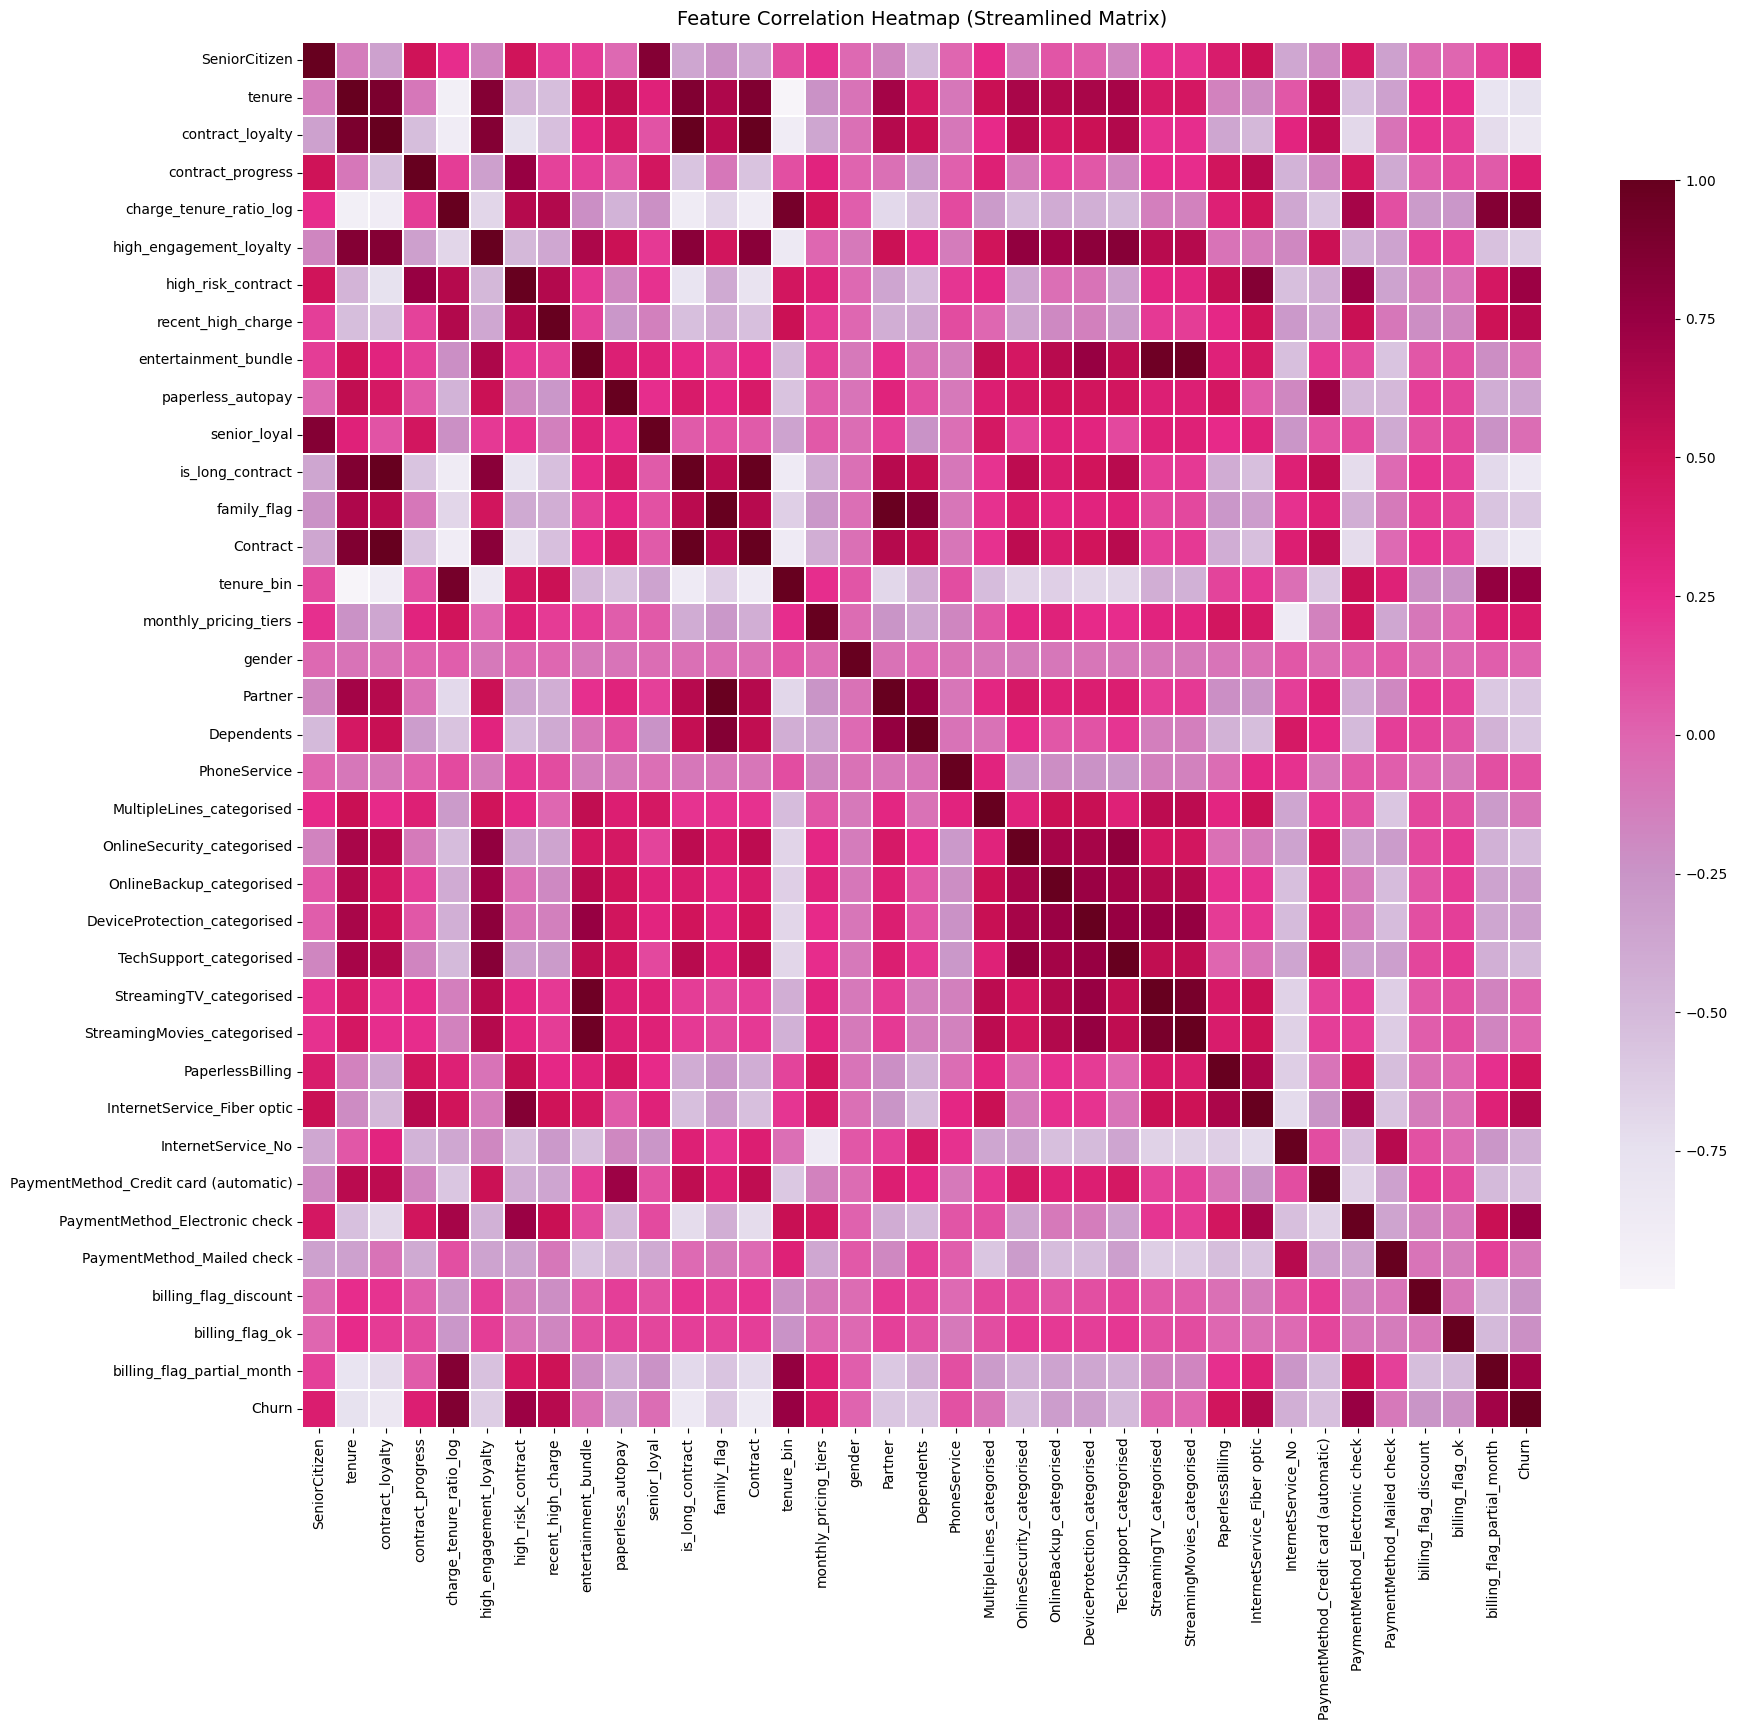

In [71]:
from matplotlib.colors import LinearSegmentedColormap

# Make a copy of the training dataset for tree-based models
corr_data_linear = X_train_linear.copy()

# Add the target column 'Churn' to the dataset to analyse correlations
corr_data_linear["Churn"] = y_train  

# Compute the pairwise correlation matrix for all features + target
corr_matrix_linear = corr_data_linear.corr()

# Set figure size
plt.figure(figsize=(20,18)) # Make the heatmap large for readability

# Plot the heatmap of correlations
sns.heatmap(
    corr_matrix_linear.corr(),
    cmap="PuRd",  # magma RdPu PuRd
    center=0,
    annot=False,
    linewidths=0.1,
    cbar_kws={"shrink": .8}
)

# Add title
plt.title("Feature Correlation Heatmap (Streamlined Matrix)", fontsize=14, pad=12)

# Display heatmap
plt.show()

In [72]:
X_train_tree.shape

(4922, 67)

In [73]:
X_train_linear.shape

(4922, 36)

In [74]:
# Create a copy of this dataset
Xy_train_tree = X_train_tree.copy()
Xy_train_tree["Churn"] = y_train # Add target back

# Compute correlation with target
correlations_tree = Xy_train_tree.corr()["Churn"].sort_values(ascending=False).round(2)

# Print correlation values
print(correlations_tree)

Churn                      1.00
charge_tenure_ratio_log    0.48
OnlineSecurity_No          0.35
TechSupport_No             0.34
tenure_bin                 0.32
                           ... 
TotalCharges_log          -0.24
tenure                    -0.35
contract_loyalty          -0.38
Contract                  -0.40
is_long_contract          -0.41
Name: Churn, Length: 68, dtype: float64


In [75]:
# Create a copy of this dataset
Xy_train_linear = X_train_linear.copy()

Xy_train_linear["Churn"] = y_train # Add target back

# Compute correlation with target
correlations_linear = Xy_train_linear.corr()["Churn"].sort_values(ascending=False).round(2)

# Print correlation values
print(correlations_linear)

Churn                                    1.00
charge_tenure_ratio_log                  0.48
tenure_bin                               0.32
high_risk_contract                       0.32
InternetService_Fiber optic              0.31
PaymentMethod_Electronic check           0.30
billing_flag_partial_month               0.25
recent_high_charge                       0.21
PaperlessBilling                         0.19
SeniorCitizen                            0.15
monthly_pricing_tiers                    0.13
StreamingTV_categorised                  0.07
StreamingMovies_categorised              0.07
contract_progress                        0.07
entertainment_bundle                     0.05
MultipleLines_categorised                0.05
PhoneService                             0.01
gender                                   0.00
senior_loyal                            -0.01
DeviceProtection_categorised            -0.06
billing_flag_ok                         -0.07
billing_flag_discount             

**<u>Observations:</u>**
1. Top correlators are: 
- charge_tenure_ratio_log (0.48)
- OnlineSecurity_No (0.35),
- TechSupport_No (0.34), 
- tenure_bin (0.32), and
- InternetService_Fibre optic (0.31). 

2. The strong negative correlators with churn are: 
- Contract (-0.40) 
- contract_loyalty (-0.38), 
- tenure (-0.35), and
- TotalChargs_log (-0.24)

Intuition is limited as nonlinear relationships and interaction effects are ignored. 

#### 1.8.2. Feature selection using statistical tests for relevance

##### 1.8.2.1. Calculating the mutual information scores 

In [76]:
from sklearn.feature_selection import mutual_info_classif

# Defining the function to calculate the mutual information scores for each matrix 
def calculate_mi_scores(feature_matrix, dependent_vector):

    # Compute the mutual information score for each feature
    mi_scores = mutual_info_classif(feature_matrix, dependent_vector)

    # Convert results into a Pandas Series for readability
    mi_scores = pd.Series(mi_scores, index=feature_matrix.columns).sort_values(ascending=False).round(2)

    # Display the feature importance scores
    return mi_scores

In [77]:
# Compute mutual information scores between features (X_train_tree) and target (y_train)
mi_scores_tree = calculate_mi_scores(feature_matrix=X_train_tree, dependent_vector=y_train)
display(mi_scores_tree)

charge_tenure_ratio_log           0.12
Contract                          0.10
is_long_contract                  0.10
contract_progress                 0.08
contract_loyalty                  0.08
                                  ... 
MultipleLines_No phone service    0.00
DeviceProtection_Yes              0.00
OnlineBackup_Yes                  0.00
StreamingMovies_Yes               0.00
billing_flag_discount             0.00
Length: 67, dtype: float64

In [78]:
# Compute mutual information scores between features (X_train_linear) and target (y_train)
mi_scores_linear = calculate_mi_scores(feature_matrix=X_train_linear, dependent_vector=y_train)
display(mi_scores_linear)

charge_tenure_ratio_log                  0.12
Contract                                 0.10
is_long_contract                         0.10
contract_progress                        0.08
contract_loyalty                         0.08
tenure                                   0.06
PaymentMethod_Electronic check           0.06
InternetService_Fiber optic              0.05
tenure_bin                               0.05
high_risk_contract                       0.04
InternetService_No                       0.03
monthly_pricing_tiers                    0.03
Dependents                               0.02
billing_flag_partial_month               0.02
family_flag                              0.02
recent_high_charge                       0.02
TechSupport_categorised                  0.02
high_engagement_loyalty                  0.02
OnlineSecurity_categorised               0.02
StreamingTV_categorised                  0.01
PaperlessBilling                         0.01
paperless_autopay                 

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1031402461.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores_tree, y=mi_scores_tree.index, palette=mi_scores_palette, edgecolor='black', saturation=1)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/1031402461.py:8: UserWarning: 
The palette list has fewer values (2) than needed (67) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=mi_scores_tree, y=mi_scores_tree.index, palette=mi_scores_palette, edgecolor='black', saturation=1)


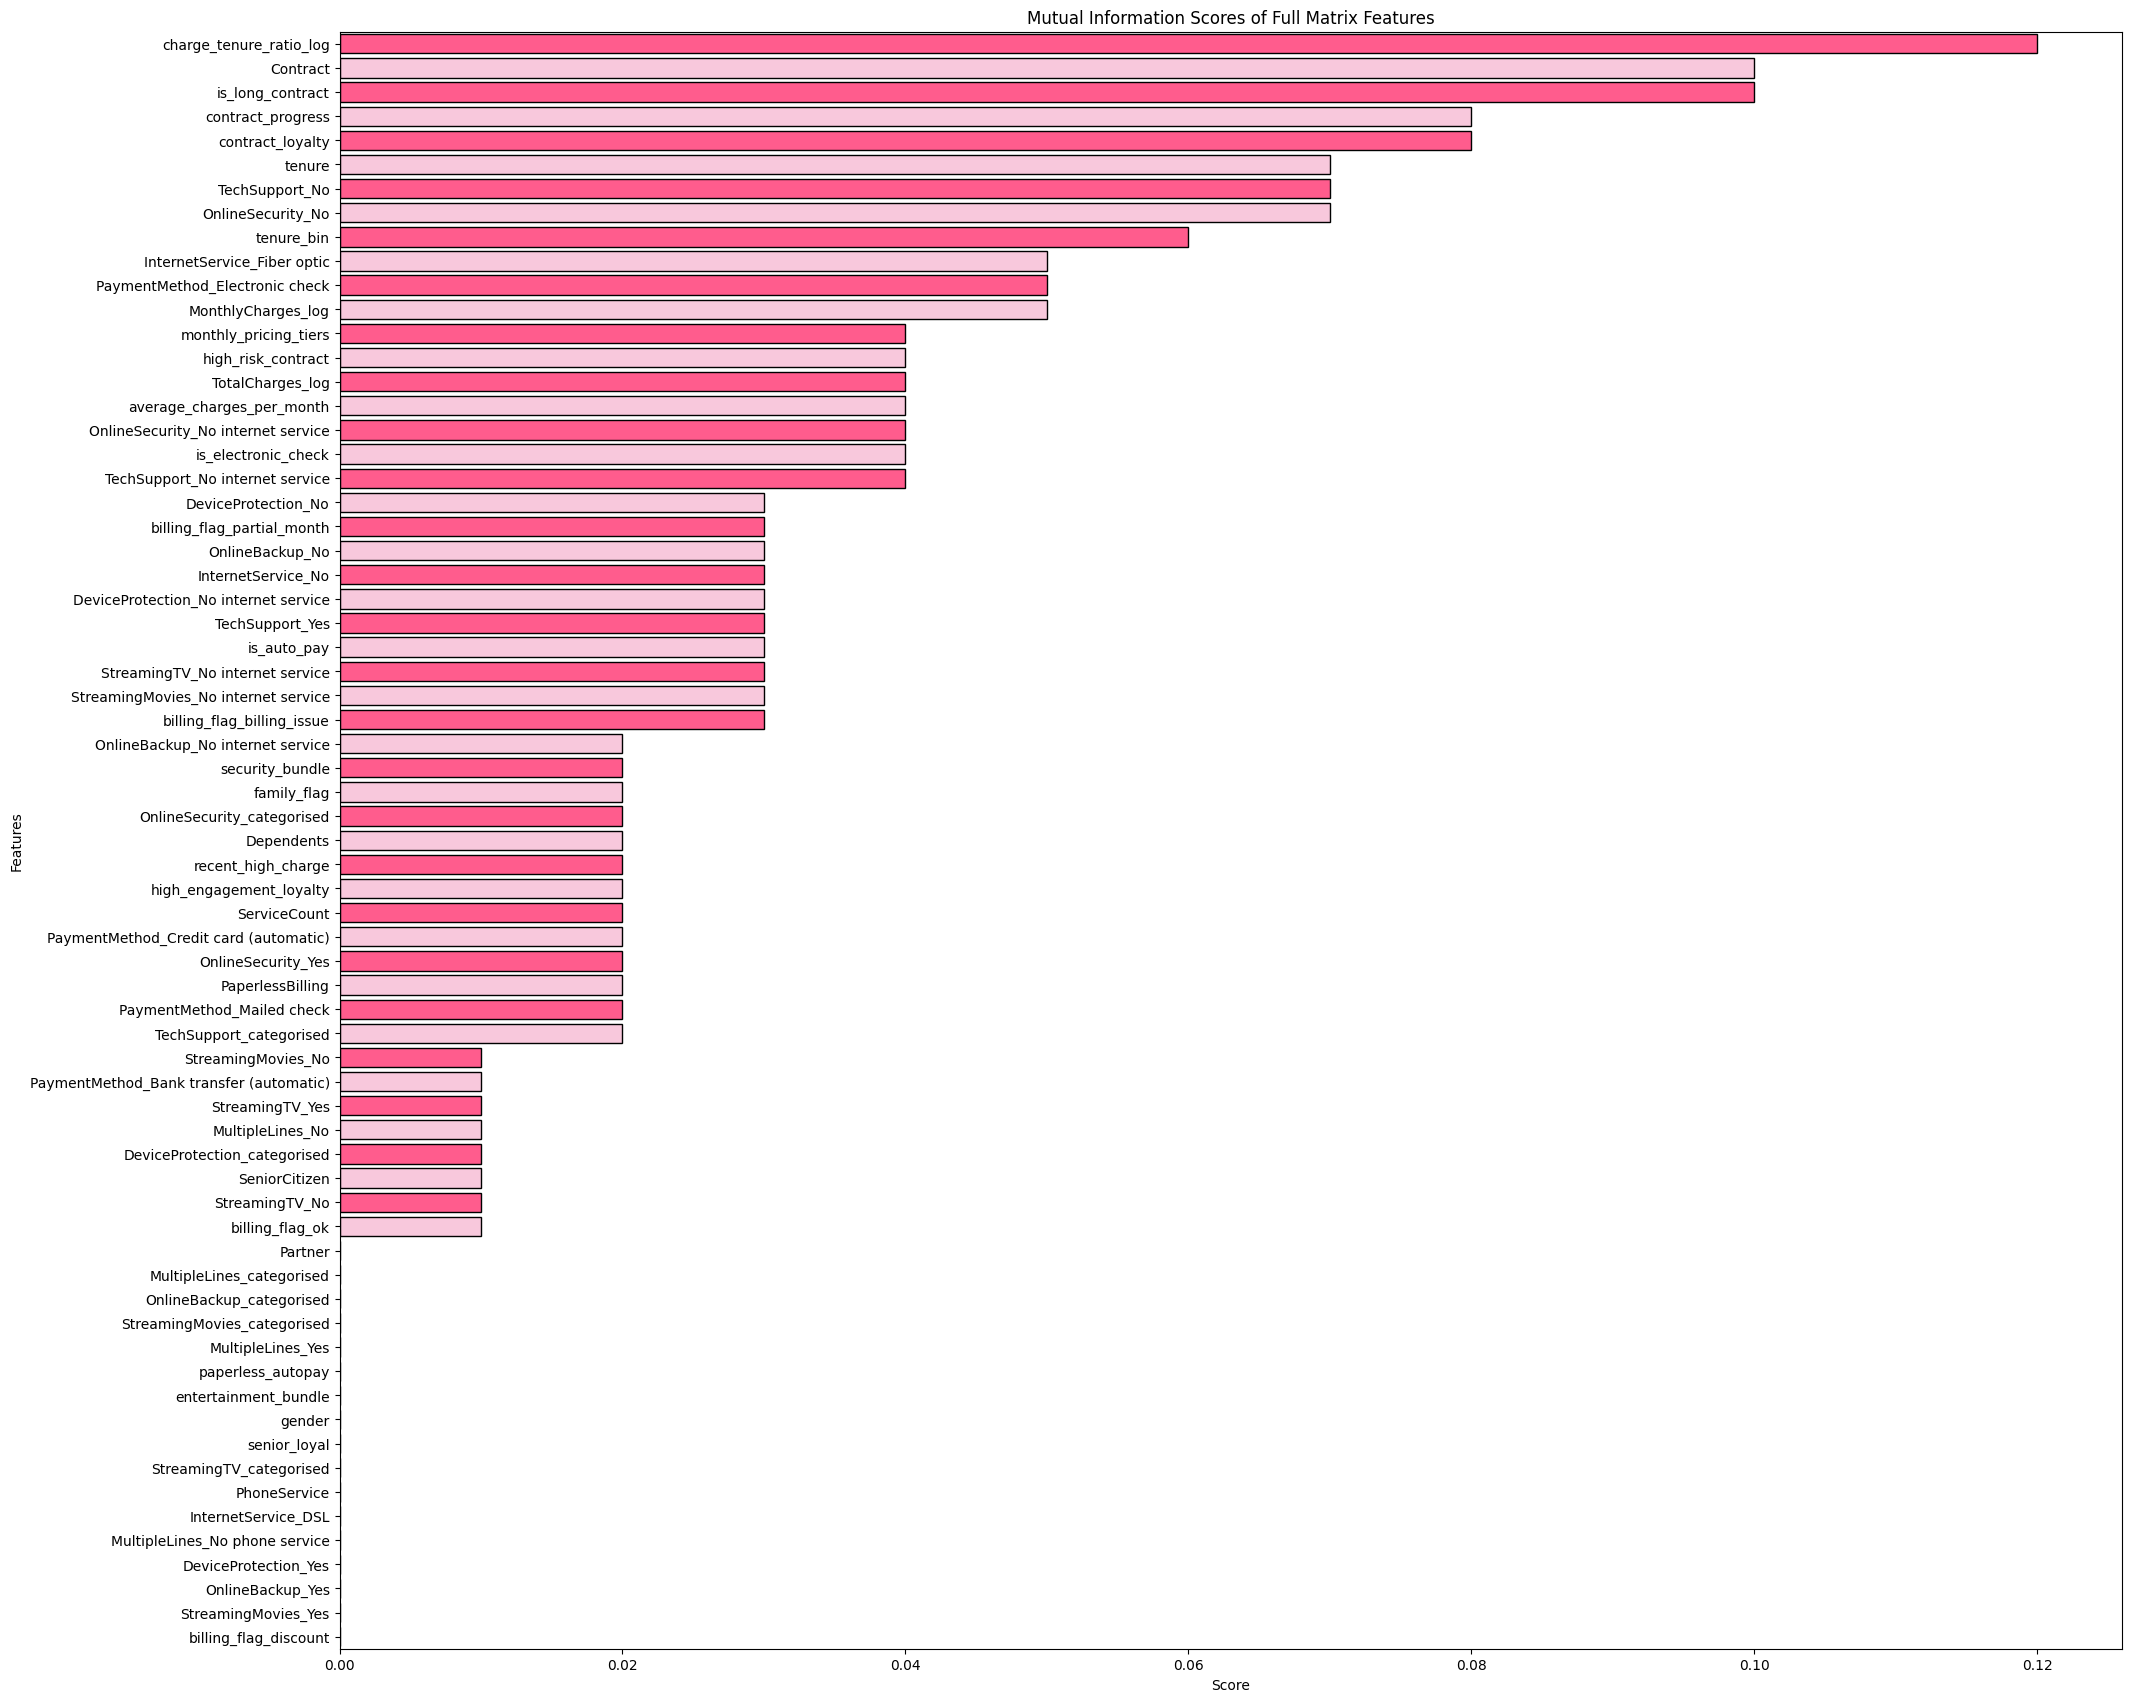

In [79]:
# Define custom palette for plots
mi_scores_palette = ['#FF5C8D', '#F8C8DC'] # pinks

# Set figure size
plt.figure(figsize=(23, 21))

# Create barplot
sns.barplot(x=mi_scores_tree, y=mi_scores_tree.index, palette=mi_scores_palette, edgecolor='black', saturation=1)  

# Add title
plt.title("Mutual Information Scores of Full Matrix Features")

# Add x-label
plt.xlabel("Score")

# Add y-label
plt.ylabel("Features")

# Display plot
plt.show()

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3747389494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores_linear, y=mi_scores_linear.index, palette=mi_scores_palette, edgecolor='black', saturation=1)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3747389494.py:5: UserWarning: 
The palette list has fewer values (2) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=mi_scores_linear, y=mi_scores_linear.index, palette=mi_scores_palette, edgecolor='black', saturation=1)


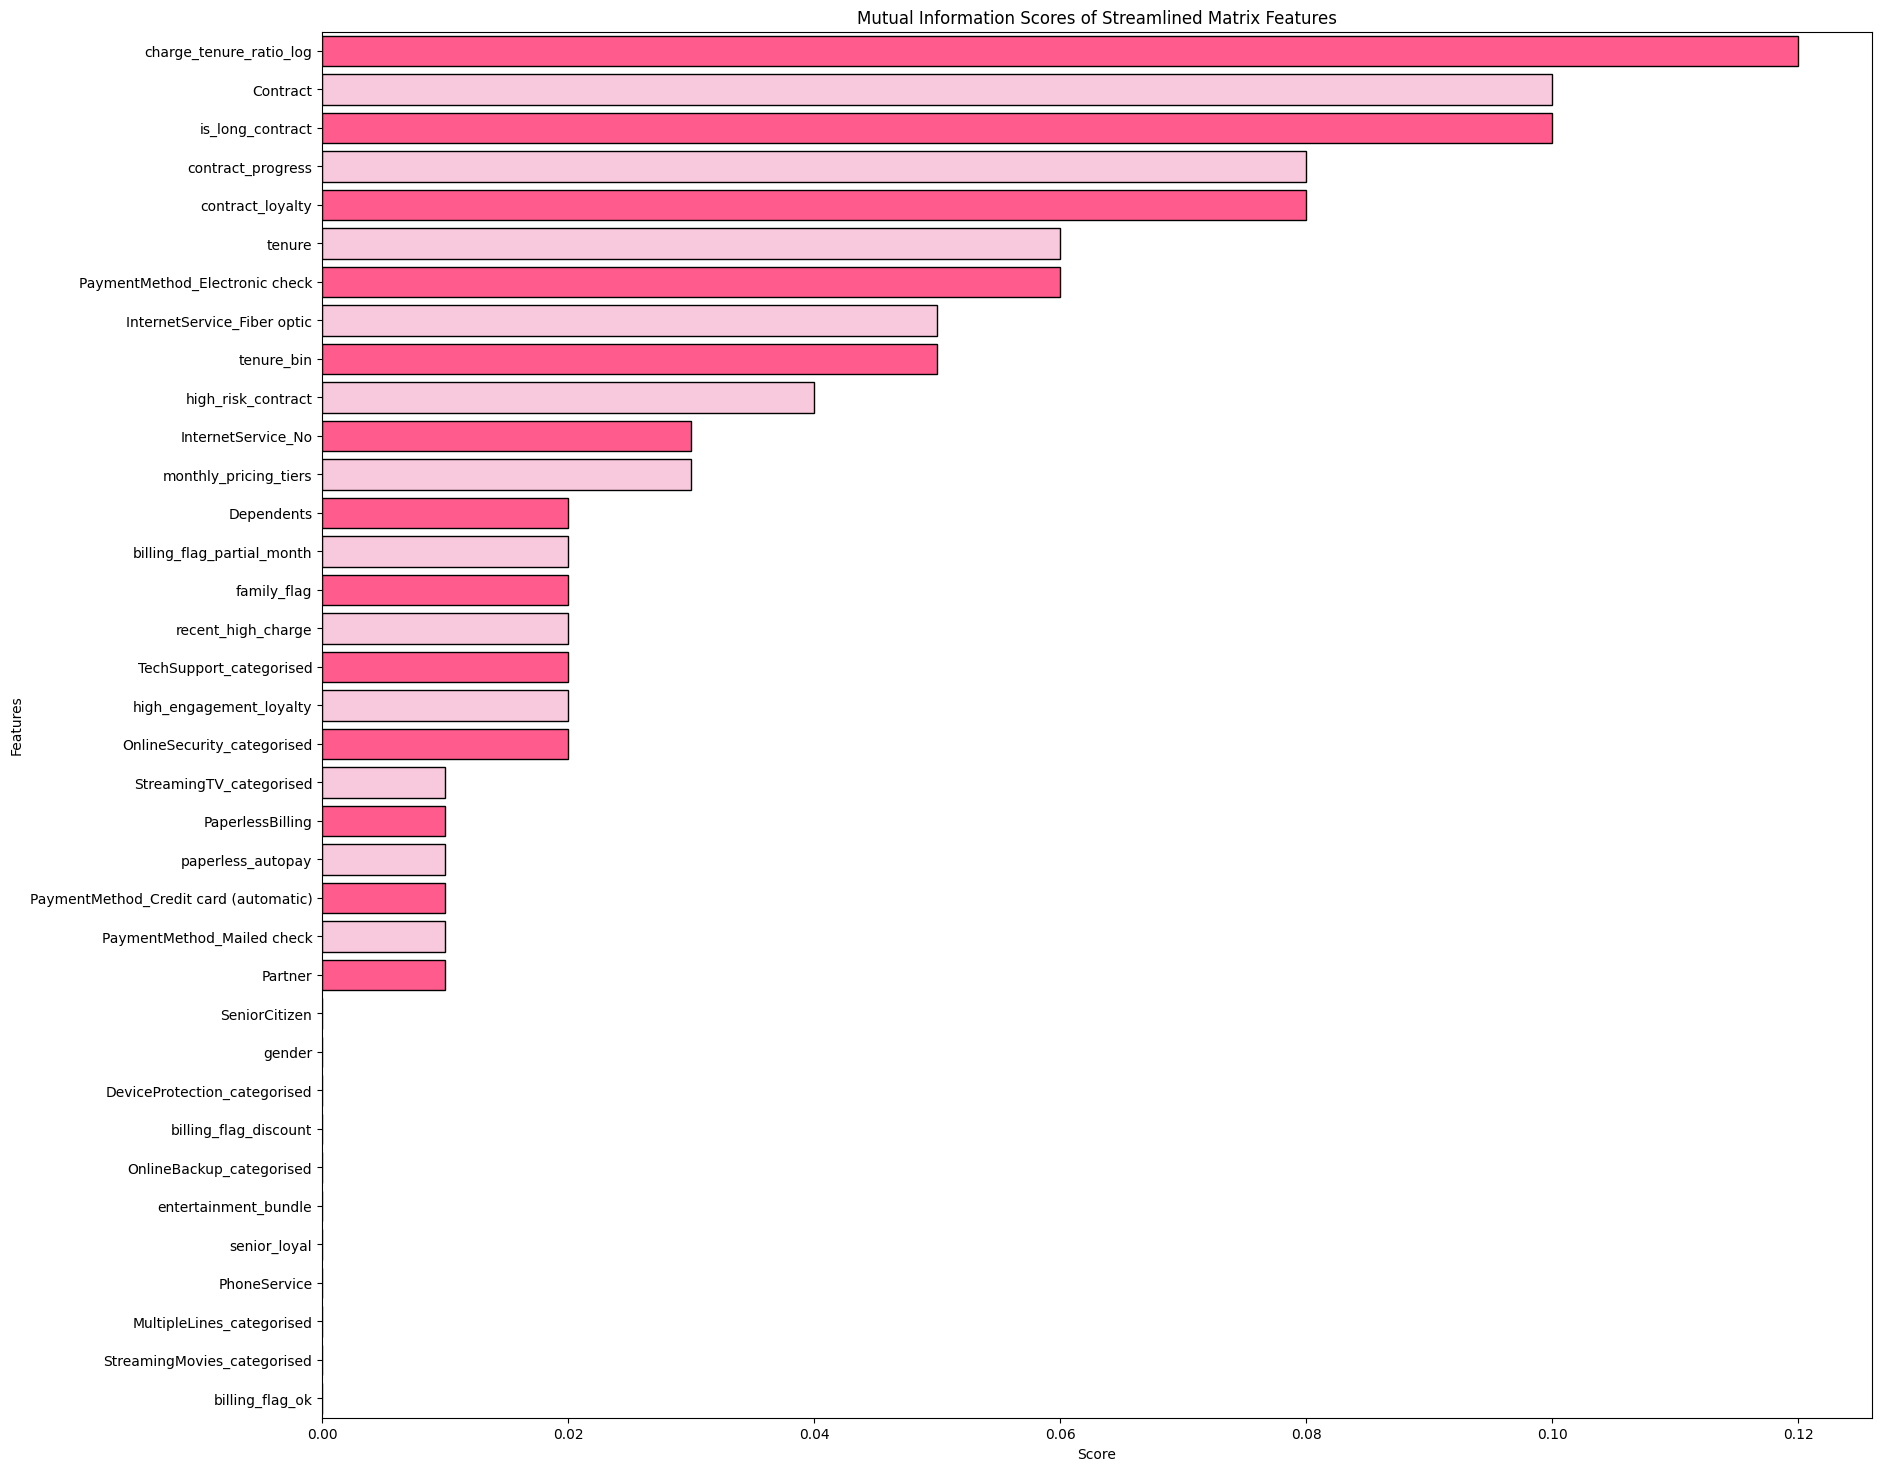

In [80]:
# Plot with seaborn 
plt.figure(figsize=(20, 18))

# Create barplot
sns.barplot(x=mi_scores_linear, y=mi_scores_linear.index, palette=mi_scores_palette, edgecolor='black', saturation=1)  

# Add title
plt.title("Mutual Information Scores of Streamlined Matrix Features")

# Add x-label
plt.xlabel("Score")

# Add y-label
plt.ylabel("Features")

# Display plot
plt.show()

**<u>Observations:</u>**
1. Strongest predictive signals for tree models are:
- charge_tenure_ratio_log
- Contract
- contract_progress  
- contract_loyalty
- tenure and
- tenure_bin 

2. Weakest informative variables are: 
- MultipleLines
- gender 
- PhoneService 
- Certain categories of ‘billing_flag’ and 
- Certain service related columns

These are marked as candidates for removal. 

#### 1.8.3. Feature selection using model-based feature importance

##### 1.8.3.1. Using a random forest model to test the tree feature matrix

In [81]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_tree, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train_tree.columns)
importances.sort_values(ascending=False).round(2)

charge_tenure_ratio_log                 0.11
TotalCharges_log                        0.08
average_charges_per_month               0.08
MonthlyCharges_log                      0.07
tenure                                  0.07
                                        ... 
StreamingTV_No internet service         0.00
PhoneService                            0.00
DeviceProtection_No internet service    0.00
TechSupport_No internet service         0.00
InternetService_No                      0.00
Length: 67, dtype: float64

/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3445539890.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette=importances_palette, edgecolor='black', saturation=1)
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3445539890.py:8: UserWarning: 
The palette list has fewer values (2) than needed (67) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=importances, y=importances.index, palette=importances_palette, edgecolor='black', saturation=1)


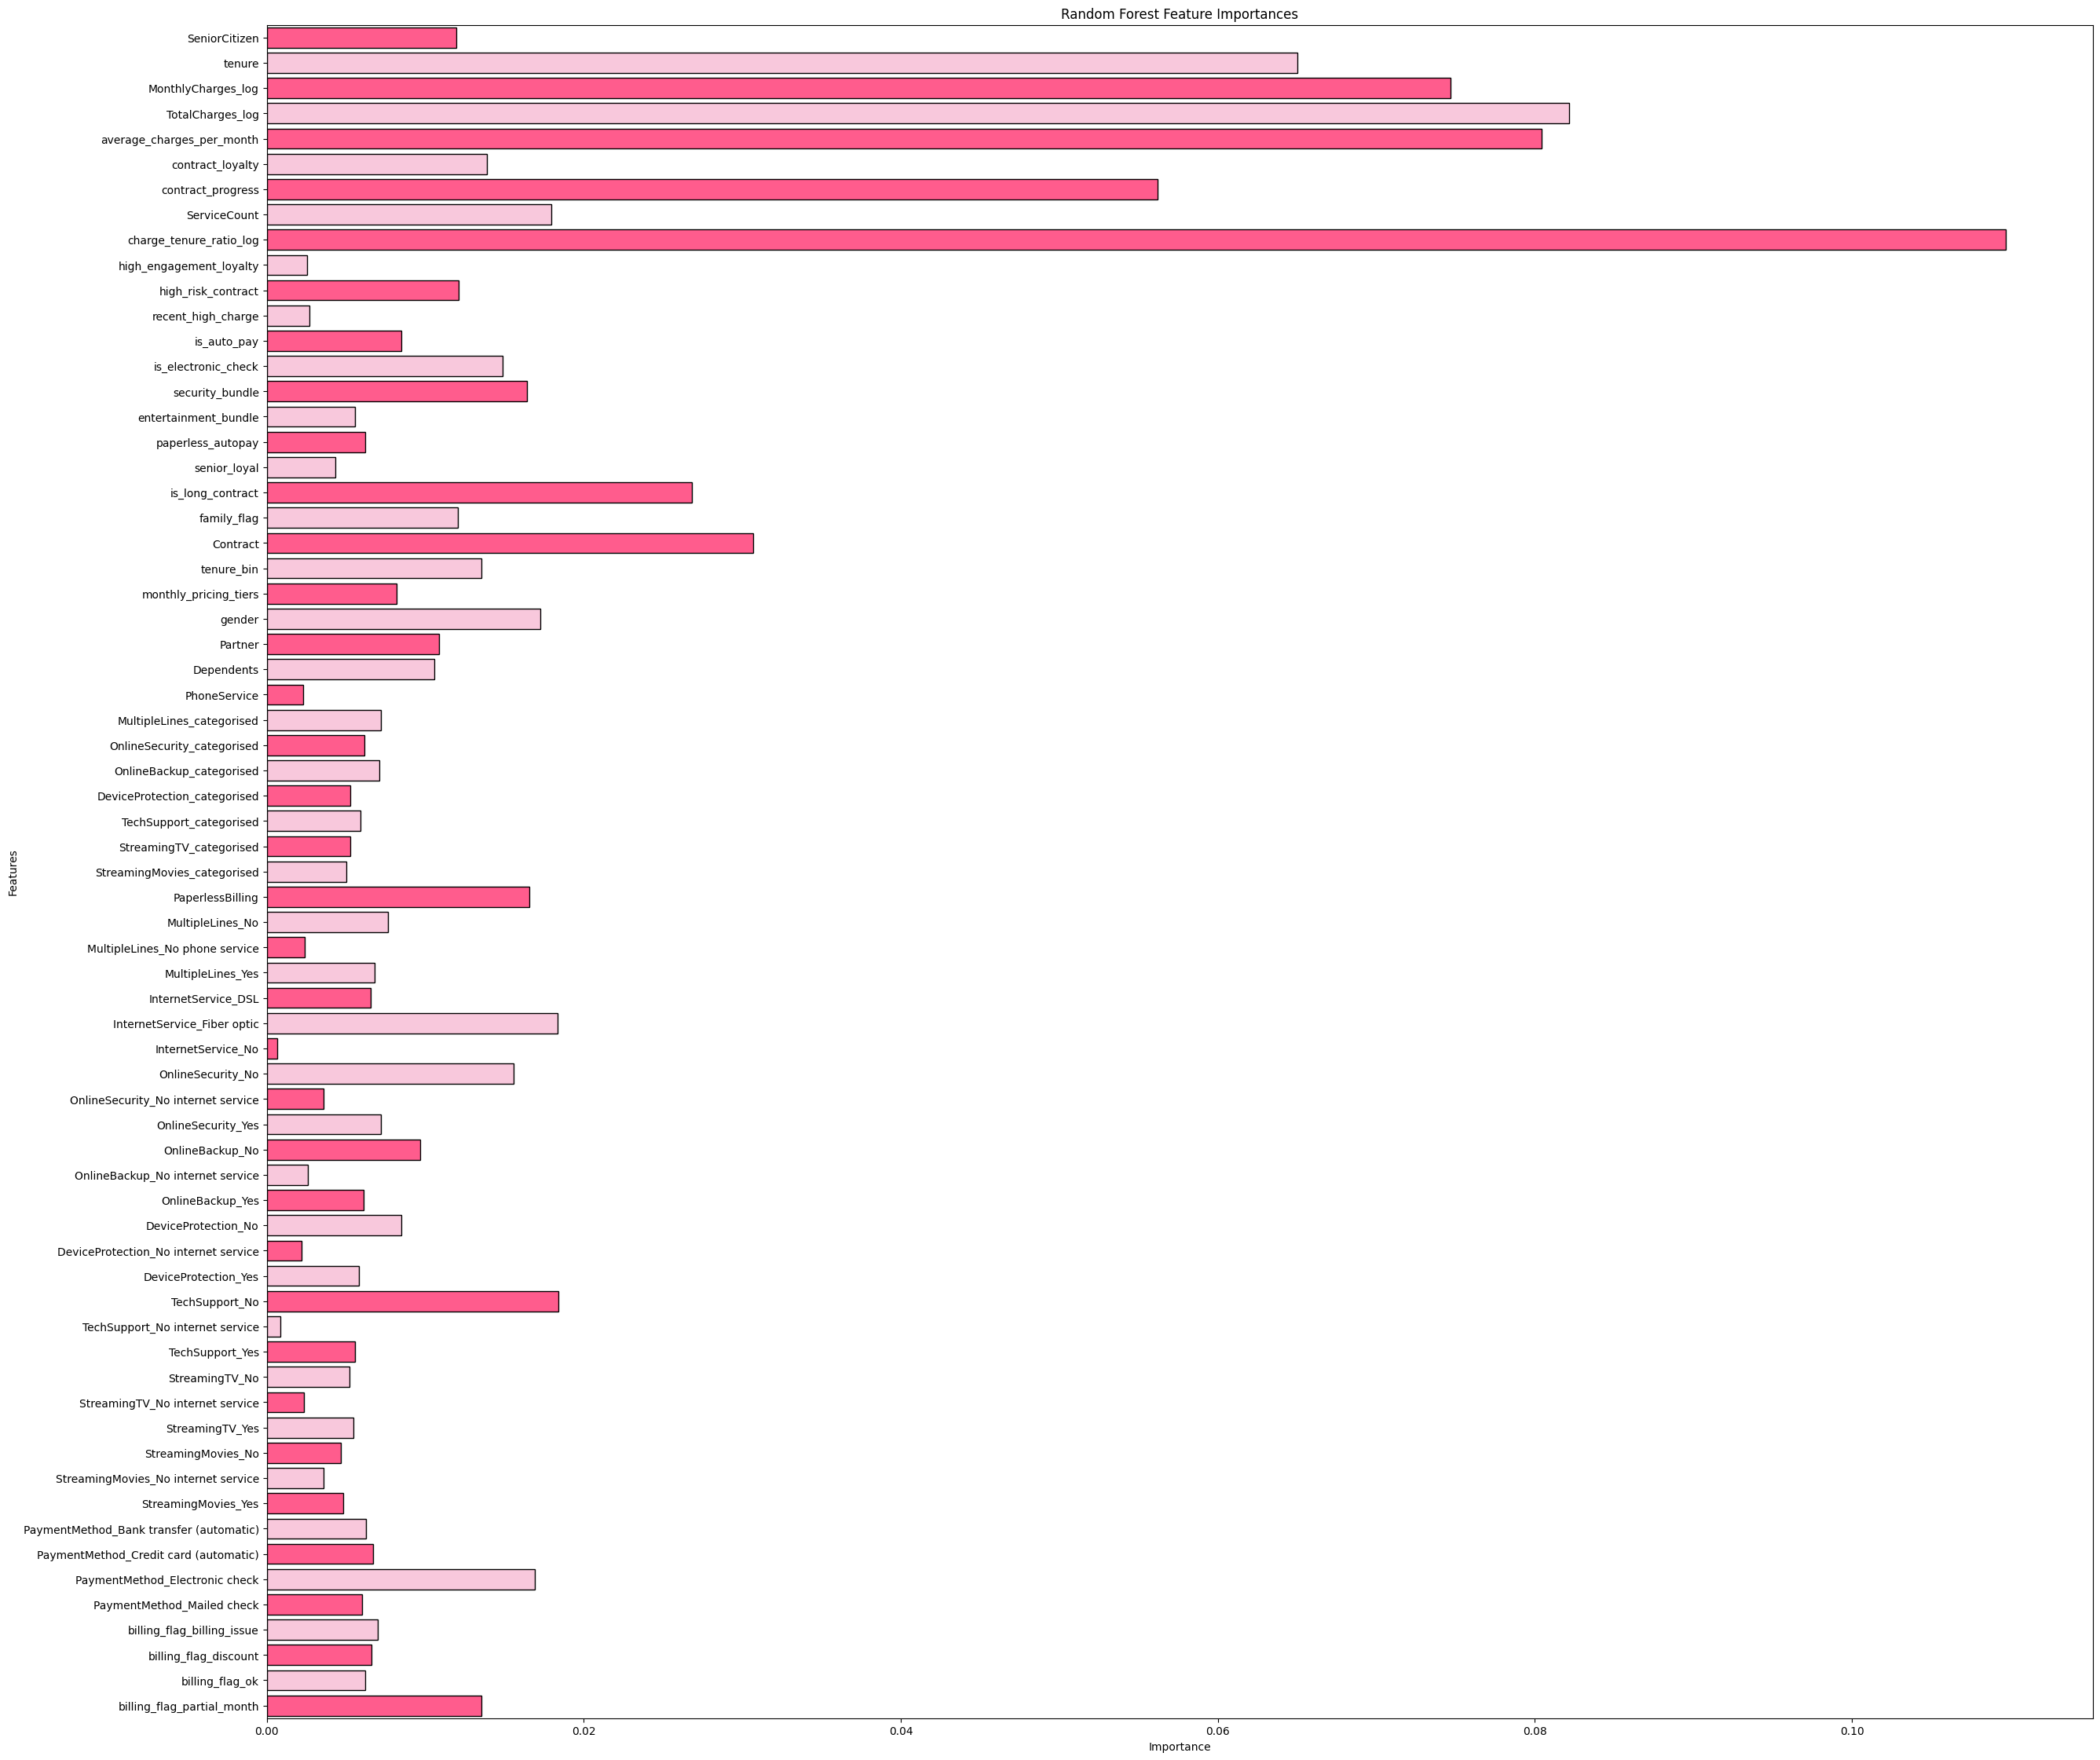

In [82]:
# Define custom palette
importances_palette = ['#FF5C8D', '#F8C8DC'] # PINKS

# Set figure size
plt.figure(figsize=(30, 28))

# Create barplot
sns.barplot(x=importances, y=importances.index, palette=importances_palette, edgecolor='black', saturation=1)

# Add title
plt.title("Random Forest Feature Importances")

# Add x-label
plt.xlabel("Importance")

# Add y-label
plt.ylabel("Features")

# Display plot
plt.show()

**<u>Observations:</u>**

- The random forest model highlights that customer tenure and payment behaviour (e.g., tenure length, average charges, and charge-to-tenure ratios) are the strongest signals of churn risk. 

- This suggests that long-term loyalty and stable payment patterns are critical for retention, and disruptions in these areas are strong warning signs.

##### 1.8.3.2. Using a logistic regression model to test the linear feature matrix

In [83]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
log_reg.fit(X_train_linear, y_train)

# Extract feature importance from coefficients
linear_importances = pd.Series(log_reg.coef_[0], index=X_train_linear.columns)

# Sort by absolute importance (magnitude of effect, not direction)
linear_importances = linear_importances.abs().sort_values(ascending=False).round(2)

print(importances) # Print importances

SeniorCitizen                 0.011942
tenure                        0.065013
MonthlyCharges_log            0.074693
TotalCharges_log              0.082148
average_charges_per_month     0.080431
                                ...   
PaymentMethod_Mailed check    0.006001
billing_flag_billing_issue    0.007013
billing_flag_discount         0.006597
billing_flag_ok               0.006204
billing_flag_partial_month    0.013557
Length: 67, dtype: float64


/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3636953834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/6v/w8nfkj8x66xc_mdtqnhljxq40000gn/T/ipykernel_8681/3636953834.py:3: UserWarning: 
The palette list has fewer values (2) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


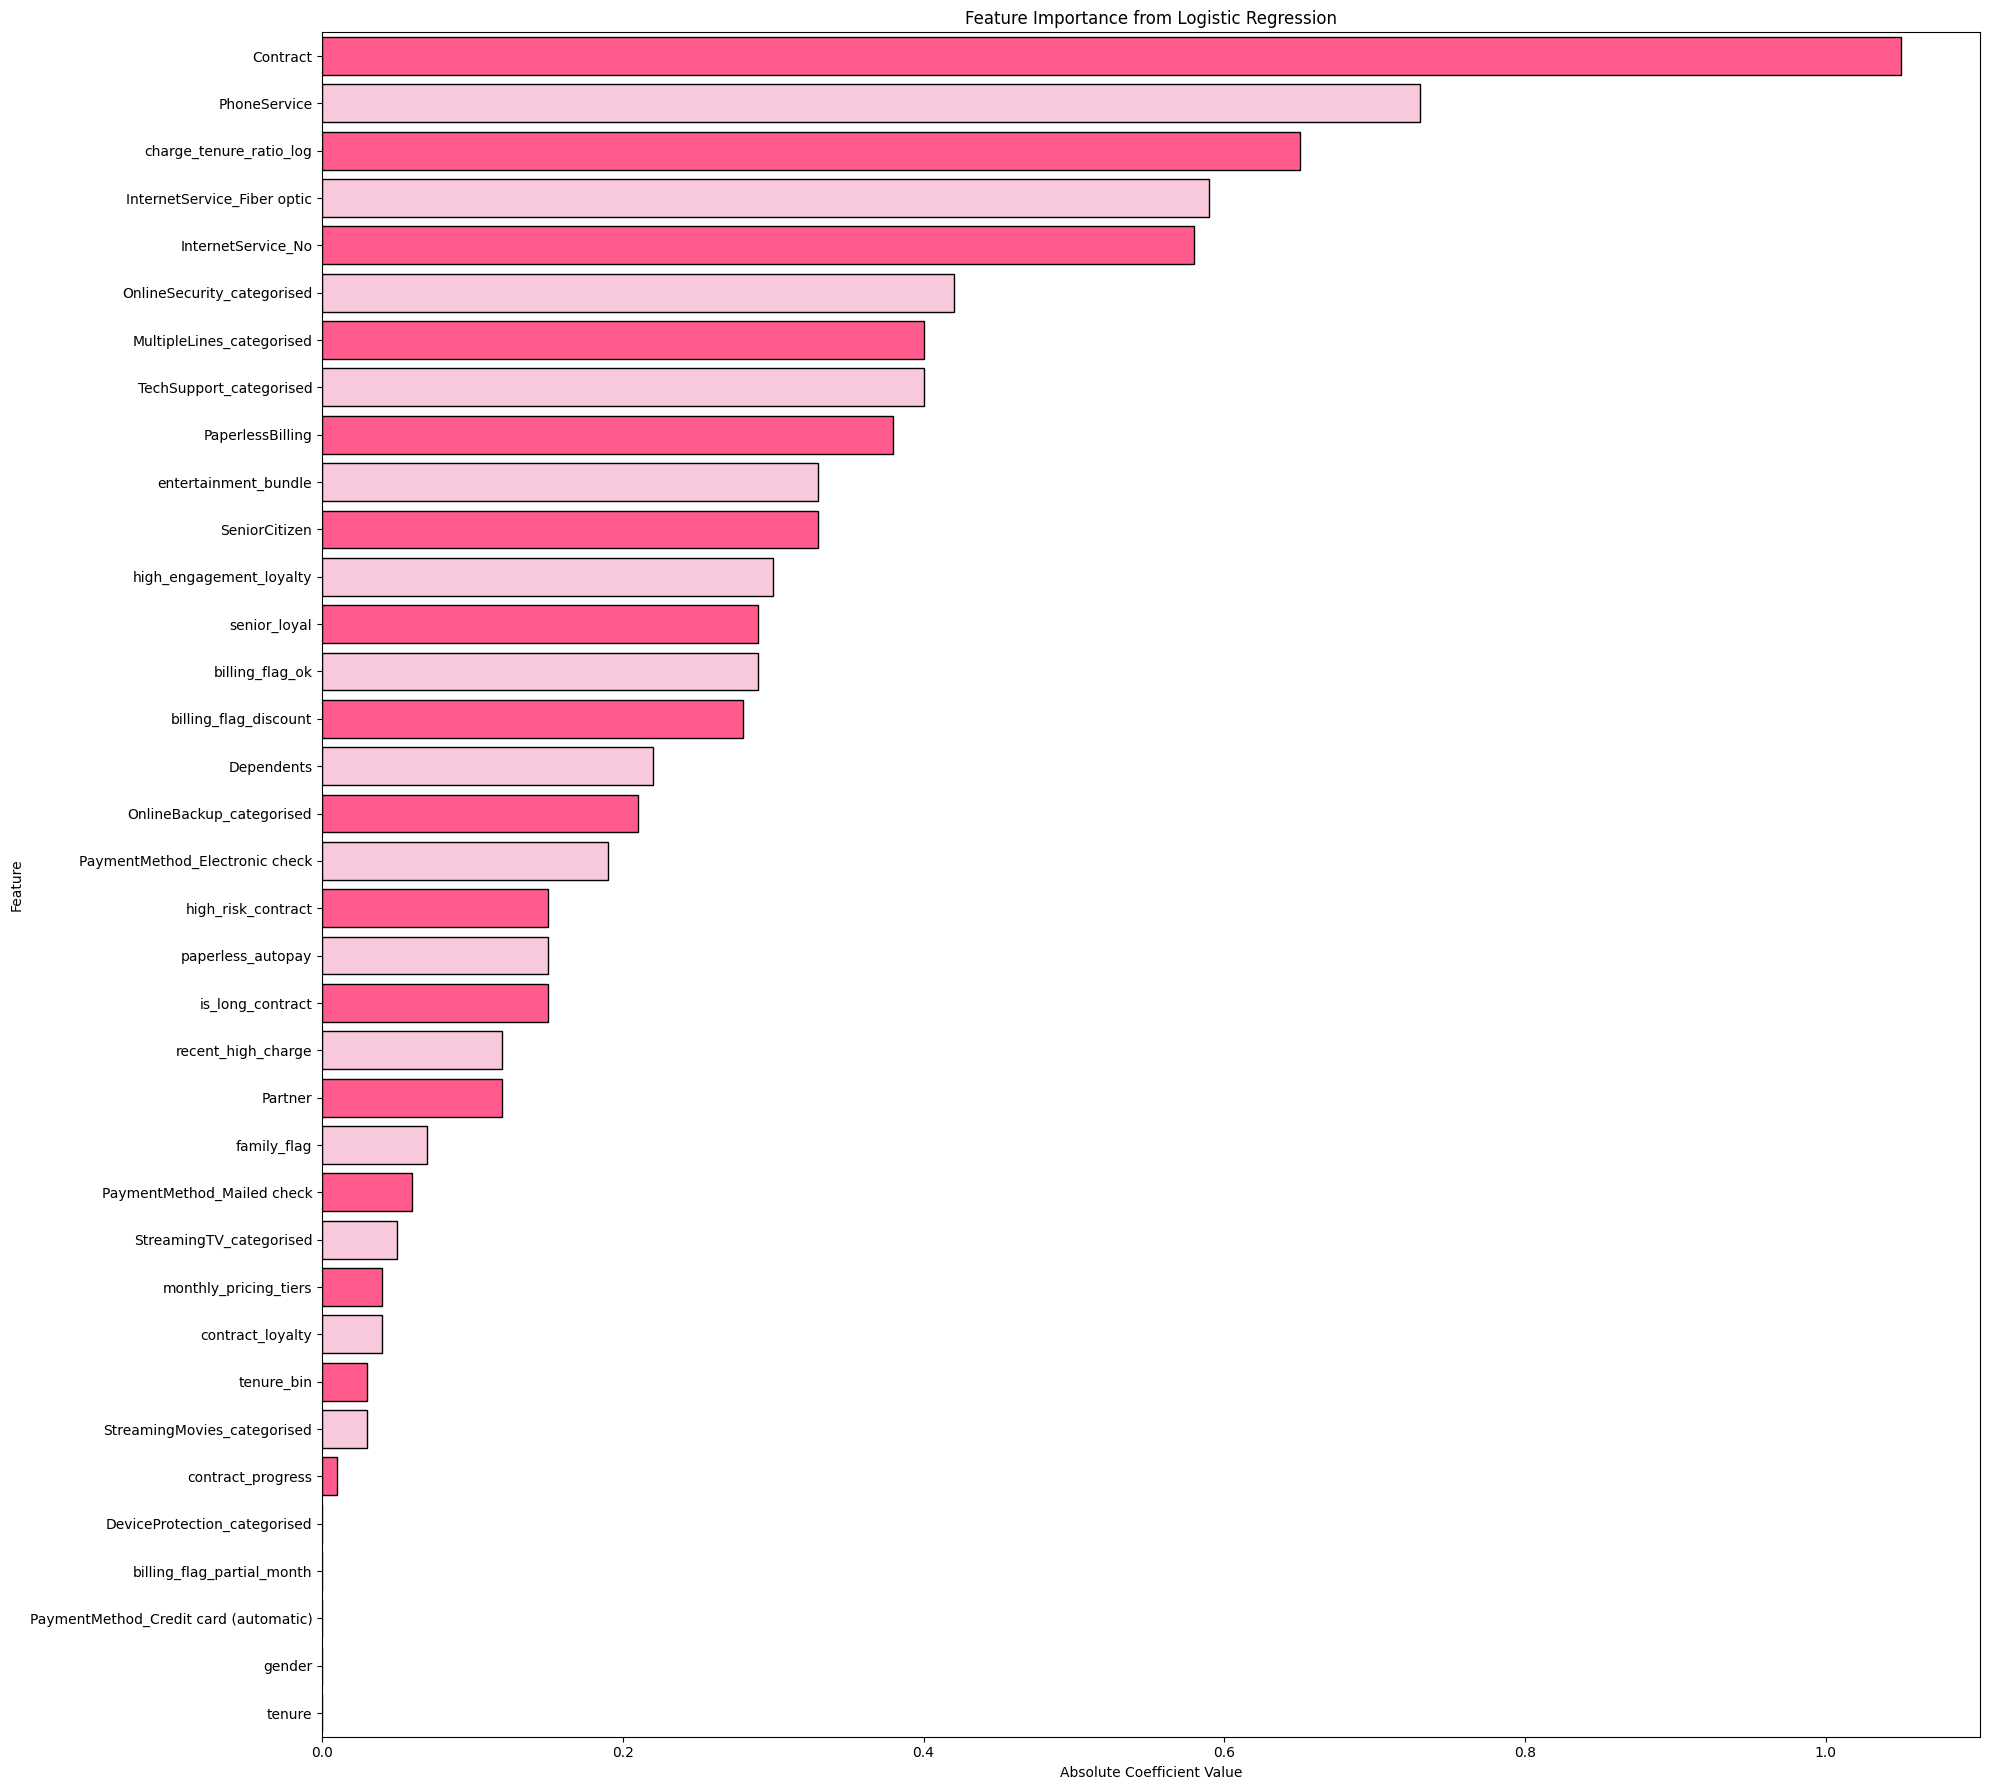

In [84]:
# Plot feature importances 
plt.figure(figsize=(20, 18))
sns.barplot(
    x=linear_importances.values,           # Importance values
    y=linear_importances.index,            # Feature names
    palette=importances_palette,
    edgecolor='black',                     # Edge color for bars
    linewidth=1,                           # Thickness of the edges
    saturation=1
)

# Add title 
plt.title("Feature Importance from Logistic Regression")

# Add x-label
plt.xlabel("Absolute Coefficient Value")

# Add y-label
plt.ylabel("Feature")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display plot
plt.show()

**<u>Observations:</u>**

- The logistic regression model assigns more weight to service-related attributes such as contract type and whether the customer has phone services or multiple lines.

- This indicates that contractual commitments and service bundles are more directly tied to churn from a linear perspective

#### 1.8.4. Dropping features of low importance 

To help reduce overfitting and improve model performance, features that performed poorly or added noise across all analyses during the feature selection phase will be dropped.

In [85]:
tree_feature_names = X_train_tree.columns
linear_feature_names = X_train_linear.columns

In [87]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_train_tree, y_train, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=X_train_tree.columns)

X_train_tree.columns = X_train_tree.columns.str.lower().str.replace(" ", "_")

rf.fit(X_train_tree, y_train)

# Later, use the same standardized dataframe
result = permutation_importance(rf, X_train_tree, y_train, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=X_train_tree.columns)

In [88]:
# Sort by importance
perm_sorted = perm_importances.sort_values(ascending=False)

# Get top N features (say top 10)
top_features = perm_sorted.head(10).index.tolist()

# Get bottom N (least important)
least_features = perm_sorted.tail(10).index.tolist()

print("Top features:", top_features)
print("Least useful features:", least_features)


Top features: ['charge_tenure_ratio_log', 'average_charges_per_month', 'contract_progress', 'totalcharges_log', 'monthlycharges_log', 'tenure', 'contract', 'gender', 'is_long_contract', 'paperlessbilling']
Least useful features: ['techsupport_no_internet_service', 'onlinesecurity_no_internet_service', 'onlinebackup_no_internet_service', 'deviceprotection_categorised', 'techsupport_categorised', 'internetservice_no', 'deviceprotection_no_internet_service', 'streamingmovies_no_internet_service', 'streamingtv_no', 'streamingtv_yes']


In [89]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf, n_features_to_select=20)  # keep best 20
rfe.fit(X_train_tree, y_train)

noise_features_tree = X_train_tree.columns[~rfe.support_].tolist()

In [90]:
noise_features_tree

['high_engagement_loyalty',
 'high_risk_contract',
 'recent_high_charge',
 'is_auto_pay',
 'is_electronic_check',
 'entertainment_bundle',
 'paperless_autopay',
 'senior_loyal',
 'tenure_bin',
 'monthly_pricing_tiers',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines_categorised',
 'onlinesecurity_categorised',
 'onlinebackup_categorised',
 'deviceprotection_categorised',
 'techsupport_categorised',
 'streamingtv_categorised',
 'streamingmovies_categorised',
 'multiplelines_no',
 'multiplelines_no_phone_service',
 'multiplelines_yes',
 'internetservice_dsl',
 'internetservice_no',
 'onlinesecurity_no_internet_service',
 'onlinesecurity_yes',
 'onlinebackup_no',
 'onlinebackup_no_internet_service',
 'onlinebackup_yes',
 'deviceprotection_no',
 'deviceprotection_no_internet_service',
 'deviceprotection_yes',
 'techsupport_no_internet_service',
 'techsupport_yes',
 'streamingtv_no',
 'streamingtv_no_internet_service',
 'streamingtv_yes',
 'streamingmovies_no',
 'streamingmovies

In [91]:
len(noise_features_tree)

47

In [92]:
X_train_tree.columns = tree_feature_names

In [93]:
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

# ✅ Step 1: standardize column names BEFORE fitting
X_train_linear.columns = X_train_linear.columns.str.lower().str.replace(" ", "_")

# ✅ Step 2: fit with renamed columns
log_reg.fit(X_train_linear, y_train)

# ✅ Step 3: run permutation importance on the SAME version of X
result = permutation_importance(log_reg, X_train_linear, y_train, n_repeats=10, random_state=42)
perm_importances_linear = pd.Series(result.importances_mean, index=X_train_linear.columns)

print(perm_importances_linear.sort_values(ascending=False))


# Sort by importance
perm_sorted_linear = perm_importances_linear.sort_values(ascending=False)

# Get top N features (say top 10)
top_features_linear = perm_sorted_linear.head(10).index.tolist()

# Get bottom N (least important)
least_features_linear = perm_sorted_linear.tail(10).index.tolist()

print("Top features:", top_features_linear)
print("Least useful features:", least_features_linear)

charge_tenure_ratio_log                  5.154409e-02
contract                                 3.063795e-02
internetservice_fiber_optic              8.695652e-03
paperlessbilling                         4.815116e-03
multiplelines_categorised                4.550996e-03
phoneservice                             3.819586e-03
entertainment_bundle                     3.555465e-03
internetservice_no                       3.352296e-03
techsupport_categorised                  3.149126e-03
partner                                  1.808208e-03
contract_progress                        1.747257e-03
onlinesecurity_categorised               1.706623e-03
high_engagement_loyalty                  1.401869e-03
high_risk_contract                       1.137749e-03
seniorcitizen                            1.097115e-03
dependents                               6.501422e-04
billing_flag_ok                          5.485575e-04
is_long_contract                         3.047542e-04
billing_flag_discount       

In [94]:
from sklearn.feature_selection import RFE

rfe_lr = RFE(estimator=log_reg, n_features_to_select=20)  # keep best 20
rfe_lr.fit(X_train_linear, y_train)

noise_features_linear = X_train_linear.columns[~rfe_lr.support_].tolist()

In [95]:
noise_features_linear

['tenure',
 'contract_loyalty',
 'contract_progress',
 'paperless_autopay',
 'is_long_contract',
 'family_flag',
 'tenure_bin',
 'monthly_pricing_tiers',
 'gender',
 'partner',
 'deviceprotection_categorised',
 'streamingtv_categorised',
 'streamingmovies_categorised',
 'paymentmethod_credit_card_(automatic)',
 'paymentmethod_mailed_check',
 'billing_flag_partial_month']

In [96]:
X_train_linear.columns = linear_feature_names

In [97]:
# List of features to drop from the tree feature matrix 
# remove_for_trees = ['PhoneService', 'MultipleLines_categorised', 'OnlineSecurity_categorised', 'OnlineBackup_categorised', 
#                     'DeviceProtection_categorised', 'TechSupport_categorised', 'StreamingTV_categorised', 'StreamingMovies_categorised',
#                     'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No internet service', 
#                     'DeviceProtection_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'OnlineBackup_No internet service'
# ]

# List of features to drop from the linear feature matrix 
remove_for_linear = ['PhoneService', 'tenure', 'contract_progress', 'gender', 'billing_flag_partial_month', 'PaymentMethod_Credit card (automatic)']

# Drop less useful features for tree-based models
# X_train_tree = X_train_tree.drop(columns=remove_for_trees) 

# Drop multicollinear/redundant features for linear models
X_train_linear = X_train_linear.drop(columns=remove_for_linear)

In [98]:
# tree_removal = ["deviceprotection_categorised", "techsupport_categorised", "internetservice_no", "onlinesecurity_no_internet_service", 
#                 "onlinebackup_no_internet_service", "deviceprotection_no_internet_service", "techsupport_no_internet_service", 
#                 "streamingtv_no", "streamingtv_yes", "streamingmovies_no_internet_service", "high_engagement_loyalty", "high_risk_contract",
#                 "recent_high_charge", "is_auto_pay", "is_electronic_check", "entertainment_bundle", "paperless_autopay", "senior_loyal",
#                 "tenure_bin", "monthly_pricing_tiers", "partner", "dependents", "phoneservice", "multiplelines_categorised", "onlinesecurity_categorised", 
#                 "onlinebackup_categorised", "streamingtv_categorised", "streamingmovies_categorised", "multiplelines_no", "multiplelines_no_phone_service",
#                 "multiplelines_yes", "internetservice_dsl", "onlinesecurity_yes", "onlinebackup_no", "onlinebackup_yes", "deviceprotection_no", 
#                 "deviceprotection_yes", "techsupport_yes", "streamingtv_no_internet_service", "streamingmovies_no", "streamingmovies_yes", 
#                 "paymentmethod_bank_transfer_(automatic)", "paymentmethod_credit_card_(automatic)", "paymentmethod_mailed_check", "billing_flag_billing_issue",
#                 "billing_flag_discount", "billing_flag_ok"]


tree_removal = ["DeviceProtection_categorised", "TechSupport_categorised", "InternetService_No", "OnlineSecurity_No internet service", 
                "OnlineBackup_No internet service", "DeviceProtection_No internet service", "TechSupport_No internet service", 
                "StreamingTV_No", "StreamingTV_Yes", "StreamingMovies_No internet service", "high_engagement_loyalty", "high_risk_contract",
                "recent_high_charge", "is_auto_pay", "is_electronic_check", "entertainment_bundle", "paperless_autopay", "senior_loyal",
                "tenure_bin", "monthly_pricing_tiers", "Partner", "Dependents", "PhoneService", "MultipleLines_categorised", "OnlineSecurity_categorised", 
                "OnlineBackup_categorised", "StreamingTV_categorised", "StreamingMovies_categorised", "MultipleLines_No", "MultipleLines_No phone service",
                "MultipleLines_Yes", "InternetService_DSL", "OnlineSecurity_Yes", "OnlineBackup_No", "OnlineBackup_Yes", "DeviceProtection_No", 
                "DeviceProtection_Yes", "TechSupport_Yes", "StreamingTV_No internet service", "StreamingMovies_No", "StreamingMovies_Yes", 
                "PaymentMethod_Bank transfer (automatic)", "PaymentMethod_Credit card (automatic)", "PaymentMethod_Mailed check", "billing_flag_billing_issue",
                "billing_flag_discount", "billing_flag_ok"]

X_train_tree = X_train_tree.drop(columns=tree_removal) 

In [100]:
X_train_tree.shape

(4922, 20)

In [99]:
len(tree_removal)

47

In [ ]:
linear_removal = ["PaymentMethod_Mailed check", "recent_high_charge", "monthly_pricing_tiers", "tenure", "OnlineBackup_categorised", 
                  "StreamingMovies_categorised", "senior_loyal", "family_flag", "paperless_autopay", "contract_loyalty", "contract_progress",
                  "is_long_contract", "gender", "Partner", "DeviceProtection_categorised", "StreamingTV_categorised", 
                  "PaymentMethod_Credit card (automatic)", "billing_flag_partial_month"]

X_train_linear = X_train_linear.drop(columns=linear_removal) 

In [ ]:
# For tree-based models
selected_tree_features = X_train_tree.columns            # Get list of tree features kept for training 
X_test_tree = X_test_tree[selected_tree_features]        # Align tree test set with selected features 

# For linear models
selected_linear_features = X_train_linear.columns        # Get list of linear features kept for training
X_test_linear = X_test_linear[selected_linear_features]  # Align linear test set with selected features

In [ ]:
X_test_tree = X_test_tree[selected_tree_features]       # Keep only tree-model features in test set to match training columns
X_test_linear = X_test_linear[selected_linear_features] # Keep only linear-model features in test set to match training columns

In [ ]:
X_train_tree.shape

(4922, 20)

In [ ]:
X_train_linear.shape

(4922, 18)

**<u>Observations:</u>**

- Multicollinearity has been eliminated in the linear feature matrix.
- All variables have safe to moderate VIF values now.
- These are now safe to put into the linear models.

In [ ]:
# Check training set size for tree model
print("Shape for X_train_tree:", X_train_tree.shape)

# Check test set size for tree model
print("Shape for X_test_tree:", X_test_tree.shape)

# Check training set size for linear model
print("Shape for X_train_linear:", X_train_linear.shape)

# Check test set size for linear model
print("Shape for X_test_linear:", X_test_linear.shape)

Shape for X_train_tree: (4922, 20)
Shape for X_test_tree: (2110, 20)
Shape for X_train_linear: (4922, 18)
Shape for X_test_linear: (2110, 18)


In [ ]:
# Save feature names
import joblib

# Save tree-model feature names for later use
joblib.dump(X_train_tree.columns.tolist(), '../saved_data/feature_names/tree_feature_names.pkl')

# Save linear-model feature names for later use
joblib.dump(X_train_linear.columns.tolist(), '../saved_data/feature_names/linear_feature_names.pkl')

['../saved_data/feature_names/linear_feature_names.pkl']

In [ ]:
# Convert to a numpy array 
X_train_tree = X_train_tree.values 
X_train_linear = X_train_linear.values 

### 1.9. Using SMOTE (Synthetic Minority Oversampling Technique) to handle imbalanced classes

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to resample training data for tree-based model
X_train_resampled_tree, y_train_resampled_tree = smote.fit_resample(X_train_tree, y_train)

# Apply SMOTE to resample training data for linear model
X_train_resampled_linear, y_train_resampled_linear = smote.fit_resample(X_train_linear, y_train)

**<u>Reasons for Using Oversampling:</u>**
- This is a mild to moderate imbalance (not extreme like 95:5), so both oversampling and undersampling are viable options — but each has trade-offs.
    - The dataset is not huge -> oversampling won’t be too slow
    - Minority class is still decently sized -> SMOTE can create diverse synthetic samples
    - Undersampling would discard too much useful data (removing from 4922 to ~1869) -> risk of underfitting and poor generalization.

**<u>Considerations for Evaluation Stage:</u>**
- During evaluation, use metrics that handle the imbalance: precision, recall, f1-score, auc-roc, and confusion matrices; avoid only using accuracy.
- Consider implementing ensemble methods like RandomForest or XGBoost; these perform better on imbalanced datasets.
- Possibly use other models or algorithms that handle imbalance better (like class_weight='balanced' in logistic regression, decision trees, etc.).

In [ ]:
from collections import Counter

# Check class distribution after resampling
print(Counter(y_train_resampled_tree))
print(Counter(y_train_resampled_linear))

Counter({np.int64(1): 3614, np.int64(0): 3614})
Counter({np.int64(1): 3614, np.int64(0): 3614})


In [ ]:
import joblib

# Save resampled training sets
joblib.dump(X_train_resampled_tree, '../saved_data/train_test_data/X_train_tree.pkl')       # Tree-model training features
joblib.dump(X_train_resampled_linear, '../saved_data/train_test_data/X_train_linear.pkl')   # Linear-model training features

# Save test feature sets
joblib.dump(X_test_tree, '../saved_data/train_test_data/X_test_tree.pkl')                   # Tree-model test features
joblib.dump(X_test_linear, '../saved_data/train_test_data/X_test_linear.pkl')               # Linear-model test features

# Save resampled training labels
joblib.dump(y_train_resampled_tree, '../saved_data/train_test_data/y_train_tree.pkl')       # Tree-model training labels
joblib.dump(y_train_resampled_linear, '../saved_data/train_test_data/y_train_linear.pkl')   # Linear-model training labels

# Save test labels
joblib.dump(y_test, '../saved_data/train_test_data/y_test.pkl')                             # Unforeseen labels

['../saved_data/train_test_data/y_test.pkl']

In [ ]:
# Save original copies

X_train_tree_original = X_train_resampled_tree.copy()       # Backup tree-model training features
X_train_linear_original = X_train_resampled_linear.copy()   # Backup linear-model training features

X_test_tree_original = X_test_tree.copy()                   # Backup tree-model test features
X_test_linear_original = X_test_linear.copy()               # Backup linear-model test features

y_train_tree_original = y_train_resampled_tree.copy()       # Backup tree-model training labels
y_train_linear_original = y_train_resampled_linear.copy()   # Backup linear-model training labels

y_test_original = y_test.copy()                             # Backup test labels

In [ ]:
# Reset before new model

X_train_tree = X_train_tree_original.copy()         # Restore tree-model training features
X_train_linear = X_train_linear_original.copy()     # Restore linear-model training features

X_test_tree = X_test_tree_original.copy()           # Restore tree-model test features
X_test_linear = X_test_linear_original.copy()       # Restore linear-model test features

y_train_tree = y_train_tree_original.copy()         # Restore tree-model training labels
y_train_linear = y_train_linear_original.copy()     # Restore linear-model training labels

y_test = y_test_original.copy()                     # Restore test labels

In [ ]:
import joblib

# --- Save scaled data ---
# joblib.dump(scaler, '../saved_data/scaler/scaler.pkl')  # in modelling.ipynb

## 2. Building the Models

Preserving the original data when testing the multiple models so that data leakage, transformation effects, or accidental mutations don’t interfere with the comparisons. Before training a new model, the working variables will be reset.

### 2.1. Building a reusable pipeline

In [ ]:
# lr_classifier = LogisticRegression(random_state=42,  C=1.0, solver='lbfgs', max_iter=1000)

# svc_classifier = SVC(kernel="linear", C=1, random_state=42)

# dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, 
#                                        min_samples_leaf=5, criterion='entropy', random_state=42)

# rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, 
#                                        min_samples_leaf=5, criterion='entropy', random_state=42)

# xgb_classifier = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=300, 
#                                max_depth=6, learning_rate=0.1, reg_alpha=0.1, reg_lambda=1.0)

# lgb_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, num_leaves=31, random_state=42)

# cat_classifier = CatBoostClassifier(random_seed=42, iterations=300, depth=6, learning_rate=0.1, verbose=0)

# models = [lr_classifier, svc_classifier, dt_classifier, rf_classifier, xgb_classifier, lgb_classifier, cat_classifier]

In [ ]:
# Import model libraries
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.svm import SVC                          # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier      # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from xgboost import XGBClassifier                    # XGBoost
from lightgbm import LGBMClassifier                  # LightGBM
from catboost import CatBoostClassifier              # CatBoost

# Instantiate the models with fixed random states
lr_classifier = LogisticRegression(random_state=42)
svc_classifier = SVC(kernel="linear", C=1, random_state=42)
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
xgb_classifier = XGBClassifier(random_state=42, n_jobs=-1)
lgb_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
cat_classifier = CatBoostClassifier(random_seed=42, verbose=0)

# Organize models into families
models = {
    "linear models": [lr_classifier, svc_classifier],
    "tree models": [dt_classifier, rf_classifier, xgb_classifier, lgb_classifier, cat_classifier]
}

# Train and save each model
for family, model_list in models.items():
    for model in model_list:  # Iterate through each model
        try:
            # Reset the data before training
            X_train_tree = X_train_tree_original.copy()
            X_train_linear = X_train_linear_original.copy()
            X_test_tree = X_test_tree_original.copy()
            X_test_linear = X_test_linear_original.copy()
            y_train_tree = y_train_tree_original.copy()
            y_train_linear = y_train_linear_original.copy()
            y_test = y_test_original.copy()

            # Fit model depending on family type
            if family == "linear models":  
                model.fit(X_train_linear, y_train_linear)
            else:
                model.fit(X_train_tree, y_train_tree)
            
            # Save trained model
            model_name = model.__class__.__name__
            save_path = f'../saved_models/{model_name}.pkl'
            joblib.dump(model, save_path)
            print(f"✅ Saved {model_name} successfully at {save_path}")

        except Exception as e:
            # Handle errors if training or saving fails
            print(f"Failed to train {model.__class__.__name__}: {e}")

✅ Saved LogisticRegression successfully at ../saved_models/LogisticRegression.pkl
✅ Saved SVC successfully at ../saved_models/SVC.pkl
✅ Saved DecisionTreeClassifier successfully at ../saved_models/DecisionTreeClassifier.pkl
✅ Saved RandomForestClassifier successfully at ../saved_models/RandomForestClassifier.pkl
✅ Saved XGBClassifier successfully at ../saved_models/XGBClassifier.pkl
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4126
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

## End of modelling phase.